In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as p
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import colors

from itertools import combinations
import scipy
from scipy.ndimage.filters import gaussian_filter1d
import sys
import os
import copy
atish_assay_path = 'fitness_assay_grantedits.py'
sys.path.append(os.path.dirname(os.path.expanduser(atish_assay_path)))
import fitness_assay_grantedits as atish

tools_path = '../code/tools.py'
sys.path.append(os.path.dirname(os.path.expanduser(tools_path)))
import tools

sns.set_style('white')
sns.set_style('ticks')
sns.set_color_codes()
from tools import mutant_colorset

In [4]:
name = 'merged+flaskswapcorrected_091119' 

merged_data = p.read_csv(f'../data/BarcodeCounts_{name}_withBCinfo.csv')

print(len(merged_data))

flask_swaps = {'Y1':'CC1','Z1':'DD1','CC1':'Y1','DD1':'Z1',
                'U1':'W1','V1':'X1','W1':'U1','X1':'V1'}

old_data = p.read_table(f'../data/Barcode_Counts_YupingProcess.tab')

merged_data = merged_data.merge(old_data,on='barcode',how='left')


print(len(merged_data))

remove_swaps = True

550
550


In [5]:
old_conditions = {
                  '3':['3.1','3.2','3.3'],
                  '6':['6.1','6.2','6.3'],
                  '13':['13.1','13.2','13.3'],
                  '18':['18.1','18.2','18.3'],
                  '20':['20.1','20.2','20.3'],
                  '21':['21.1','21.2','21.3'],
                  '23':['23.1','23.2','23.3']
                 }

old_conditions = {
                  '3':['t3.1','t3.2','t3.3'],
                  '6':['t6.1','t6.2','t6.3'],
                  '13':['t13.1','t13.2','t13.3'],
                  '18':['t18.1','t18.2','t18.3'],
                  '19':['t19.1','t19.2','t19.3'],
                  '20':['t20.1','t20.2','t20.3'],
                  '21':['t21.1','t21.2','t21.3'],
                  '23':['t23.1','t23.2','t23.3'],
                  'M3_Batch_3':['3.1','3.2','3.3'],
                  'M3_Batch_6':['6.1','6.2','6.3'],
                  'M3_Batch_13':['13.1','13.2','13.3'],
                  'M3_Batch_18':['18.1','18.2','18.3'],
#                   'M3_Batch_19':['t19.1','t19.2','t19.3'],
                  'M3_Batch_20':['20.1','20.2','20.3'],
                  'M3_Batch_21':['21.1','21.2','21.3'],
                  'M3_Batch_23':['23.1','23.2','23.3'],
                  'Ferm_44hr_Transfer':['t14.1','t14.2','t14.3'],
                  'Ferm_40hr_Transfer':['t15.1','t15.2','t15.3'],
                  'Ferm_54hr_Transfer':['t16.1','t16.2','t16.3'],
                  'Ferm_50hr_Transfer':['t17.1','t17.2','t17.3'],
                  'Resp_24hr_Transfer':['t5.1','t5.2','t5.3'],
                  'Resp_3Day_Transfer':['t7.1','t7.2','t7.3'],
                  'Resp_4Day_Transfer':['t8.1','t8.2'], # 8.3 has too little data
                  'Resp_5Day_Transfer':['t25.1','t25.2','t25.3'],
                  'Resp_6Day_Transfer':['t26.1','t26.2','t26.3'],
                  'Resp_7Day_Transfer':['t27.1','t27.2','t27.3'],
                  'DMSO':['t1.1','t1.2','t1.3'],
                  'Geldanamycin8.5uM':['t2.4','t2.5','t2.6'],
                    ## radicicol
                    ## benomyl
                    ## fluconazole
                    '1.4%':['1.4%-R1','1.4%-R2'],
                    '1.5%':['1.5%-R1','1.5%-R2'],
                    '1.6%':['1.6%-R1','1.6%-R2'],
                    '1.7%':['1.7%-R1','1.7%-R2'],
                    '1.8%':['1.8%-R1','1.8%-R2'],
#                     '2.5%':['2.5%-R1','2.5%-R2'],  # not enough usable data
#                     'Ben0.4':['Ben0.4-R1','Ben0.4-R2'], # not enough usable data
#                     'Ben2':['Ben2-R1','Ben2-R2'], # not enough usable data
#                     'Ben10':['Ben10-R1','Ben10-R2'],
    
    }

bigbatch_conditions = {
                        '1BB_M3':['A','B','C','D'],
                        '1BB_Baffle':['E','F'],
                        '1BB_1.4%Gluc' :['G','H'],
                        '1BB_1.8%Gluc' :['I','J'],
                        '1BB_0.2MNaCl' :['K','L'],
#                         '1BB_0.2MNaCl' :['K'], 
                        '1BB_0.5MNaCl' :['M','N'],
                        '1BB_0.2MKCl' :['O'],
                        '1BB_0.5MKCl' :['P'],
                        '1BB_8.5uMGdA' :['Q','R'],
                        '1BB_17uMGdA' :['S','T'],
                        '1BB_2ugFlu' :['U','V'],
                        '1BB_0.5ugFlu' :['W','X'],
                        '1BB_1%Raf' :['Y','Z'],
                        '1BB_0.5%Raf' :['AA','BB'],
                        '1BB_1%Gly' :['CC','DD'],
                        '1BB_1%EtOH' :['EE','FF'],
                        '1BB_SucRaf' :['GG'],
                      }



conditions = {**old_conditions, **bigbatch_conditions}

just_reps = [rep for reps in conditions.values() for rep in reps]

In [6]:
full_neutral_list = [17615,18486,42040,45014,58284,63611,73731,74185,80465,94896
,120600,125697,132511,134852,135750,190551,228237,238783,255561,298344
,308537,316954,317346,335717,411685,454359,469053] 

### from previous list but never has fitness above 3.5% (per gen) in any of 5000bc experiments
supergood_neutral = [17615, 24362, 42040, 71926, 72939, 73802, 80465, 109476, 113483, 
                     134852, 135750, 238783, 263665, 276406, 316954, 335717, 454359] 

### pulled from supergood list and spiked into 1BigBatch experiments
neutral_spikes = [17615,24362,42040,71926,73802,109476,113483,134852,263665,316954]

# neutrals = full_neutral_list
neutrals = list(np.unique(full_neutral_list+supergood_neutral+neutral_spikes))




In [7]:
{col:np.count_nonzero(merged_data[col]) for col in merged_data.columns}

{'1.4%-R1-T1': 525,
 '1.4%-R1-T2': 520,
 '1.4%-R1-T3': 521,
 '1.4%-R1-T4': 510,
 '1.4%-R2-T1': 409,
 '1.4%-R2-T2': 514,
 '1.4%-R2-T3': 512,
 '1.4%-R2-T4': 504,
 '1.4%-T0': 509,
 '1.5%-R1-T1': 520,
 '1.5%-R1-T2': 512,
 '1.5%-R1-T3': 504,
 '1.5%-R1-T4': 505,
 '1.5%-R2-T1': 512,
 '1.5%-R2-T2': 514,
 '1.5%-R2-T3': 516,
 '1.5%-R2-T4': 511,
 '1.5%-T0': 514,
 '1.6%-R1-T1': 525,
 '1.6%-R1-T2': 522,
 '1.6%-R1-T3': 515,
 '1.6%-R1-T4': 520,
 '1.6%-R2-T1': 518,
 '1.6%-R2-T2': 523,
 '1.6%-R2-T3': 520,
 '1.6%-R2-T4': 518,
 '1.6%-T0': 514,
 '1.7%-R1-T1': 517,
 '1.7%-R1-T2': 522,
 '1.7%-R1-T3': 517,
 '1.7%-R1-T4': 513,
 '1.7%-R2-T1': 517,
 '1.7%-R2-T2': 520,
 '1.7%-R2-T3': 511,
 '1.7%-R2-T4': 520,
 '1.7%-T0': 519,
 '1.8%-R1-T1': 521,
 '1.8%-R1-T2': 520,
 '1.8%-R1-T3': 518,
 '1.8%-R1-T4': 525,
 '1.8%-R2-T1': 524,
 '1.8%-R2-T2': 527,
 '1.8%-R2-T3': 506,
 '1.8%-R2-T4': 507,
 '1.8%-T0': 519,
 '13-0': 445,
 '13-0_pool': 483,
 '13-1-1': 515,
 '13-1-2': 515,
 '13-1-3': 513,
 '13-2-1': 515,
 '13-2-2': 519,
 '

(-0.001, 0.02)

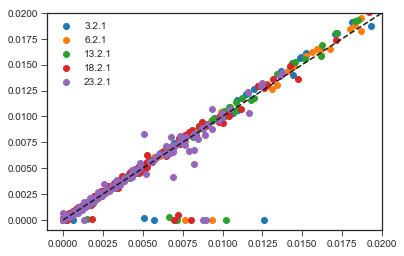

In [23]:
data = merged_data
data = data[~(data['barcode'].isin([7777777,9999999]))]
data = data.sort_values('barcode')

samples = ['3.1.1','6.1.1','13.1.1','18.1.1','23.1.1']
samples = ['3.2.1','6.2.1','13.2.1','18.2.1','23.2.1']
for sample in samples:


    plt.scatter(data[f't{sample}']/np.nansum(data[f't{sample}']),
                data[f'{sample.replace(".","-")}']/np.nansum(data[f'{sample.replace(".","-")}']),label=sample)
plt.plot([0,0.1],[0,0.1],'k--')
plt.legend()
plt.xlim(-0.001,0.02)
plt.ylim(-0.001,0.02)

In [8]:
column_counts = {col:np.count_nonzero(merged_data[col]) for col in merged_data.columns}

cutoff = 400

sparse_samples = []

for sample,count in column_counts.items():
    if count < 400:
        sparse_samples.append(sample)
        
print(sparse_samples)
        

['2.5%-R1-T1', '2.5%-R1-T2', '2.5%-R1-T3', '2.5%-R1-T4', '2.5%-R2-T1', '2.5%-R2-T2', '2.5%-R2-T3', '2.5%-R2-T4', '2.5%-T0', '21+wt', '6-1-3', '6-2-2', 'Ben0.4-R1-T1', 'Ben0.4-R1-T2', 'Ben0.4-R1-T3', 'Ben0.4-R1-T4', 'Ben0.4-R2-T1', 'Ben0.4-R2-T2', 'Ben0.4-R2-T3', 'Ben0.4-R2-T4', 'Ben0.4-T0', 'Ben10-R1-T2', 'Ben10-R1-T4', 'Ben10-R2-T1', 'Ben10-T0', 'Ben2-R1-T1', 'Ben2-R1-T2', 'Ben2-R1-T3', 'Ben2-R1-T4', 'Ben2-R2-T1', 'Ben2-R2-T2', 'Ben2-R2-T3', 'Ben2-R2-T4', 'Ben2-T0', 'L2', 'N2', 'N3', 'N4', 'T4', 'X1', 't6.1.3', 't6.2.2', 't16.0.x', 't16.0.pool.x', 't16.0.y', 't16.0.pool.y', 't16.4.1.y', 't16.4.3.y', 't17.3.3.y', 't17.4.1.y', 't17.4.2.y']


In [21]:
data = merged_data
data = data[~(data['barcode'].isin([7777777,9999999]))]
data = data.sort_values('barcode')

data[data['barcode'].isin([13183])][['F0','F1','F2']].values
np.sum(data[['F0','F1','F2']],axis=0)

# merged_data['F']

F0    1569404.0
F1    5377130.0
F2    4003213.0
dtype: float64

In [22]:
data[data['barcode'].isin([13183])][['F0','F1','F2']].values

array([[1644., 4048., 1769.]])

In [23]:
1644/ 1569404

0.0010475314195707414

In [45]:
remove_swaps = True
weighted = True
save_output = True

data = merged_data
data = data[~(data['barcode'].isin([7777777,9999999]))]
data = data.sort_values('barcode')
data = data.drop(columns=sparse_samples) # sparse timepoints resulting a lot of missing data
if remove_swaps:
    data = data.drop(columns=[col for col in flask_swaps.keys() if col not in sparse_samples]) # sparse timepoints resulting a lot of missing data
data = data.fillna(0)

cov_thresh = 1000

### called neutral by atish's method in ALL 5000 bc experiments (I think - need to verify this)
### [could also be below some set threshold across all experiments]
full_neutral_list = [17615,18486,42040,45014,58284,63611,73731,74185,80465,94896
,120600,125697,132511,134852,135750,190551,228237,238783,255561,298344
,308537,316954,317346,335717,411685,454359,469053] 

### from previous list but never has fitness above 3.5% (per gen) in any of 5000bc experiments
supergood_neutral = [17615, 24362, 42040, 71926, 72939, 73802, 80465, 109476, 113483, 
                     134852, 135750, 238783, 263665, 276406, 316954, 335717, 454359] 

### pulled from supergood list and spiked into 1BigBatch experiments
neutral_spikes = [17615,24362,42040,71926,73802,109476,113483,134852,263665,316954]

# neutrals = full_neutral_list
neutrals = list(np.unique(full_neutral_list+supergood_neutral+neutral_spikes))

neutrals = [bc for bc in data['barcode'].values if bc in neutrals]
# neutrals = data[data['gene']=='other']['barcode'].values
# neutrals = neutral_spikes
print(neutrals)

fitnesses = {}

other_info = ['barcode','gene','type','ploidy','class','additional_muts']

for condition,replicates in conditions.items():
    print(condition)
    print(replicates)
    rep_times = {}
    for rep in replicates:
        
        these_times = []
        timepoints = []
        if condition in old_conditions.keys():
            
            if '%' in rep or 'Ben' in rep:
                e,r = rep.split('-')
                if e+'-T0' in data.columns:
                    these_times.append(e+'-T0')
                    timepoints.append(0)

                for i in range(1,5):
                    if rep+'-T'+str(i) in data.columns:
                        these_times.append(rep+'-T'+str(i))
                        timepoints.append(i)
            
            else:

                e,r = rep.split('.')
    #             if e in ['13','15']:
    #                 timepoints.append(0)
    #                 these_times.append('13-0_pool')
    #             else:
    #                 if e+'-0' in data.columns:
    #                     timepoints.append(0)
    #                     these_times.append(e+'-0')
                if e in ['t16','t17']:
                    for t in range(1,5):
                        if e+'.'+str(t)+'.'+r+'.x' in data.columns:
                            timepoints.append(t)
                            these_times.append(e+'.'+str(t)+'.'+r+'.x')

                elif 't' in e:
                    for t in range(1,5):
                        if e+'.'+str(t)+'.'+r in data.columns:
                            timepoints.append(t)
                            these_times.append(e+'.'+str(t)+'.'+r)
                else:
                    for t in range(1,5):
                        if e+'-'+str(t)+'-'+r in data.columns:
                            timepoints.append(t)
                            these_times.append(e+'-'+str(t)+'-'+r)
                

        if condition in bigbatch_conditions.keys():
            for i in range(5):
                if rep+str(i) in data.columns:
                    these_times.append(rep+str(i))
                    timepoints.append(i)
        
        rep_times[rep] = data[these_times].values
        print(timepoints)
        print(rep)
    print({rep:np.nansum(rep_times[rep],axis=0) for rep in rep_times.keys()})
    print(rep_times)
#     answer = atish.inferFitness(data['barcode'].values,timepoints,rep_times,
#                                 neutralBarcodes=neutrals,lowCoverageThresh=cov_thresh,useMultNoise=True,weightedMean=weighted)
    answer = atish.inferFitness(data['barcode'].values,timepoints,rep_times,
                                neutralBarcodes=neutrals,lowCoverageThresh=cov_thresh,use_all_neutral=True,useMultNoise=True,weightedMean=weighted)

    for rep in replicates:

        fitnesses[rep+'_fitness'] = answer[rep]['aveFitness']
        fitnesses[rep+'_error'] = answer[rep]['aveError']

for other_setting in other_info:
    if other_setting in data.columns:
        fitnesses[other_setting] = data[other_setting].values

fitness_df = p.DataFrame(fitnesses)
fitness_df = fitness_df.replace([np.inf, -np.inf], np.nan)
# fitness_df = fitness_df.replace([float('Inf'),-float('Inf'),np.inf, -np.inf], np.nan)

for condition,replicates in conditions.items():
    
    
    fitness_df[condition+'_fitness'] = np.nansum([fitness_df[rep+'_fitness'].values/fitness_df[rep+'_error'].values for rep in replicates],axis=0) \
    /np.nansum([1.0/fitness_df[rep+'_error'].values for rep in replicates],axis=0)
    
    fitness_df[condition+'_error'] = np.nansum([1.0/fitness_df[rep+'_error'].values for rep in replicates],axis=0)**(-1)


    
fitness_df = fitness_df[other_info+[col for col in fitness_df if col not in other_info]]

# if save_output:
#     if weighted:
#         if not remove_swaps:
#             fitness_df.to_csv('../data/fitness_weighted_allconditions.csv',index=False)
#         else:
#             fitness_df.to_csv('../data/fitness_weighted_allconditions_swapsremoved.csv',index=False)

#     else:
#         if not remove_swaps:
#             fitness_df.to_csv('../data/fitness_unweighted_allconditions.csv',index=False)
#         else:
#             fitness_df.to_csv('../data/fitness_unweighted_allconditions_swapsremoved.csv',index=False)


[17615, 24362, 42040, 71926, 72939, 73802, 109476, 113483, 120600, 134852, 263665, 298344, 316954]
3
['t3.1', 't3.2', 't3.3']
[1, 2, 3, 4]
t3.1
[1, 2, 3, 4]
t3.2
[1, 2, 3, 4]
t3.3
{'t3.1': array([1351750., 2135554., 1618035., 3250337.]), 't3.2': array([1933347., 2417818., 3119308., 2877315.]), 't3.3': array([1283986., 2070974., 2469955., 3200478.])}
{'t3.1': array([[2.32000e+02, 1.72000e+02, 7.90000e+01, 9.90000e+01],
       [5.20510e+04, 9.83780e+04, 9.78250e+04, 2.08593e+05],
       [1.08300e+03, 7.16000e+02, 2.76000e+02, 2.08000e+02],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00]]), 't3.2': array([[3.55000e+02, 1.50000e+02, 9.30000e+01, 6.60000e+01],
       [8.41730e+04, 1.15547e+05, 1.79070e+05, 2.02527e+05],
       [1.75800e+03, 6.60000e+02, 4.32000e+02, 2.04000e+02],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+

/Users/grantkinsler/Documents/Stanford/Research/TheoryPaper/code/fitness_assay_grantedits.py:226: RuntimeWarning: divide by zero encountered in power
  zScores = zScores*np.power(expectedReads,-0.5)
/Users/grantkinsler/Documents/Stanford/Research/TheoryPaper/code/fitness_assay_grantedits.py:226: RuntimeWarning: invalid value encountered in multiply
  zScores = zScores*np.power(expectedReads,-0.5)
/Users/grantkinsler/Documents/Stanford/Research/TheoryPaper/code/fitness_assay_grantedits.py:396: RuntimeWarning: divide by zero encountered in log
  allTimeFitness = np.log(allReads[repName][:,1:]/totReads[1:])-np.log(allReads[repName][:,0:-1]/totReads[0:-1])
/Users/grantkinsler/Documents/Stanford/Research/TheoryPaper/code/fitness_assay_grantedits.py:396: RuntimeWarning: invalid value encountered in subtract
  allTimeFitness = np.log(allReads[repName][:,1:]/totReads[1:])-np.log(allReads[repName][:,0:-1]/totReads[0:-1])
/Users/grantkinsler/Documents/Stanford/Research/TheoryPaper/code/fitness_a

 1292.0 527.0
neutral reads 3023.0 1766.0
neutral reads 1766.0 1292.0
neutral reads 1292.0 527.0
Multiplicative noise consistency checks

t21.1  inconsistent times:

kappas [5.80677869 2.10617187 4.41783127]
multNoise [0.09695231 0.20298416 0.25279151]
No clear inconsistencies


t21.2  inconsistent times:

kappas [0.40168467 0.43622334 2.18037684]
multNoise [0.09695231 0.20298416 0.25279151]
No clear inconsistencies


t21.3  inconsistent times:

kappas [1.35479494 3.62633131 2.44042749]
multNoise [0.09695231 0.20298416 0.25279151]
No clear inconsistencies

23
['t23.1', 't23.2', 't23.3']
[1, 2, 3, 4]
t23.1
[1, 2, 3, 4]
t23.2
[1, 2, 3, 4]
t23.3
{'t23.1': array([ 859040., 1325607., 1259098., 1507525.]), 't23.2': array([1174543., 1499762., 1646984., 1891246.]), 't23.3': array([ 964881., 1433689., 1147297., 1407623.])}
{'t23.1': array([[ 1404.,  1650.,  1270.,   882.],
       [12748., 31760., 48017., 62509.],
       [ 1285.,  1340.,   821.,   743.],
       ...,
       [    0.,     0.,     0

neutral reads 6318.0 3137.0
neutral reads 3137.0 1540.0
neutral reads 1540.0 238.0
neutral reads 5852.0 760.0
neutral reads 760.0 1633.0
neutral reads 1633.0 290.0
neutral reads 5852.0 760.0
neutral reads 760.0 1633.0
neutral reads 1633.0 290.0
Multiplicative noise consistency checks

13.1  inconsistent times:

kappas [2.82470696 3.01839509 1.55358576]
multNoise [0.10038618 0.12688153 0.08983962]
No clear inconsistencies


13.2  inconsistent times:

kappas [3.4658313  3.17779013 0.76077469]
multNoise [0.10038618 0.12688153 0.08983962]
No clear inconsistencies


13.3  inconsistent times:

kappas [2.21562536 4.04330693 0.56820968]
multNoise [0.10038618 0.12688153 0.08983962]
No clear inconsistencies

M3_Batch_18
['18.1', '18.2', '18.3']
[1, 2, 3, 4]
18.1
[1, 2, 3, 4]
18.2
[1, 2, 3, 4]
18.3
{'18.1': array([ 289364.,  104194., 2365972., 5334166.]), '18.2': array([ 288742.,  265561.,  672289., 6473791.]), '18.3': array([ 197126., 1361173., 2640349., 3884864.])}
{'18.1': array([[9.00000e+01,

{'t15.1': array([270689., 847917., 535232., 671054.]), 't15.2': array([ 215107.,  415085., 2495778.,  228241.]), 't15.3': array([368664., 354814., 700659., 333472.])}
{'t15.1': array([[1.2500e+02, 2.4700e+02, 7.4000e+01, 5.2000e+01],
       [1.1362e+04, 3.5684e+04, 3.8375e+04, 6.3889e+04],
       [6.4300e+02, 1.1050e+03, 3.5000e+02, 1.6000e+02],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]]), 't15.2': array([[9.80000e+01, 1.12000e+02, 2.52000e+02, 3.00000e+00],
       [1.03320e+04, 2.18820e+04, 1.98701e+05, 2.21390e+04],
       [4.66000e+02, 5.10000e+02, 1.19300e+03, 5.90000e+01],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00]]), 't15.3': array([[1.9900e+02, 1.1500e+02, 1.3300e+02, 1.7000e+01],
       [1.02

neutral reads 1030.0 367.0
neutral reads 367.0 99.0
neutral reads 99.0 31.0
neutral reads 1030.0 367.0
neutral reads 367.0 99.0
neutral reads 99.0 31.0
neutral reads 870.0 337.0
neutral reads 337.0 164.0
neutral reads 164.0 54.0
neutral reads 826.0 310.0
neutral reads 310.0 161.0
neutral reads 161.0 48.0
neutral reads 1398.0 591.0
neutral reads 591.0 337.0
neutral reads 337.0 236.0
neutral reads 1398.0 591.0
neutral reads 591.0 337.0
neutral reads 337.0 236.0
Multiplicative noise consistency checks

t26.1  inconsistent times:

kappas [1.45798273 1.55690864 1.45458954]
multNoise [0.43559814 0.4114318  0.26759957]
No clear inconsistencies


t26.2  inconsistent times:

kappas [1.26554846 1.45463622 1.32602022]
multNoise [0.43559814 0.4114318  0.26759957]
No clear inconsistencies


t26.3  inconsistent times:

kappas [0.60411036 1.87501547 2.21914086]
multNoise [0.43559814 0.4114318  0.26759957]
No clear inconsistencies

Resp_7Day_Transfer
['t27.1', 't27.2', 't27.3']
[1, 2, 3, 4]
t27.1
[1, 

neutral reads 246.0 701.0
neutral reads 701.0 253.0
neutral reads 253.0 139.0
neutral reads 139.0 70.0
neutral reads 246.0 701.0
neutral reads 701.0 253.0
neutral reads 253.0 139.0
neutral reads 139.0 70.0
neutral reads 246.0 10.0
neutral reads 10.0 300.0
neutral reads 300.0 101.0
neutral reads 101.0 56.0
neutral reads 181.0 10.0
neutral reads 10.0 227.0
neutral reads 227.0 83.0
neutral reads 83.0 46.0
Multiplicative noise consistency checks

1.4%-R1  inconsistent times:

kappas [5.66010244 1.93202858 0.3001202  0.58597388]
multNoise [0.1        0.15663227 0.04400092 0.1069252 ]
No clear inconsistencies


1.4%-R2  inconsistent times:

kappas [0.24971314 6.37113794 2.09305416 1.59974933]
multNoise [0.1        0.15663227 0.04400092 0.1069252 ]
No clear inconsistencies

1.5%
['1.5%-R1', '1.5%-R2']
[0, 1, 2, 3, 4]
1.5%-R1
[0, 1, 2, 3, 4]
1.5%-R2
{'1.5%-R1': array([ 54249.,  74392., 109587., 129257., 252771.]), '1.5%-R2': array([ 54249.,  61242., 106603., 129417., 221091.])}
{'1.5%-R1': arr

neutral reads 66313.0 47231.0
neutral reads 47231.0 13568.0
neutral reads 13568.0 1225.0
neutral reads 1225.0 1262.0
neutral reads 66277.0 47203.0
neutral reads 47203.0 13564.0
neutral reads 13564.0 1225.0
neutral reads 1225.0 1260.0
neutral reads 18147.0 34355.0
neutral reads 34355.0 12842.0
neutral reads 12842.0 1380.0
neutral reads 1380.0 855.0
neutral reads 18147.0 34355.0
neutral reads 34355.0 12842.0
neutral reads 12842.0 1380.0
neutral reads 1380.0 855.0
Multiplicative noise consistency checks

I  inconsistent times:

kappas [18.47251843  6.73871868  3.58562255  3.4674751 ]
multNoise [0.1076651  0.04185463 0.08327063 0.07073765]
No clear inconsistencies


J  inconsistent times:

kappas [29.39735518  4.94697943  1.41166013  1.3528503 ]
multNoise [0.1076651  0.04185463 0.08327063 0.07073765]
No clear inconsistencies

1BB_0.2MNaCl
['K', 'L']
[0, 1, 2, 3, 4]
K
[0, 1, 3, 4]
L
{'K': array([ 557594., 4026764., 1965749.,  422848.,  588294.]), 'L': array([4830326., 2220931.,  310663.,  5

neutral reads 31096.0 4882.0
neutral reads 4882.0 223707.0
neutral reads 223707.0 730.0
neutral reads 31096.0 4882.0
neutral reads 4882.0 223707.0
neutral reads 223707.0 730.0
Multiplicative noise consistency checks

W  inconsistent times:

kappas [5.05234913 7.16312862 1.55925767]
multNoise [0.19721888 0.09990405 0.13885099]
No clear inconsistencies


X  inconsistent times:

kappas [ 6.83820056 96.18682141  3.03900833]
multNoise [0.19721888 0.09990405 0.13885099]
No clear inconsistencies

1BB_1%Raf
['Y', 'Z']
[0, 2, 3, 4]
Y
[0, 2, 3, 4]
Z
{'Y': array([  997018., 17161782., 13717665.,  5754673.]), 'Z': array([ 419253., 1073907.,   54780., 1556404.])}
{'Y': array([[1.125000e+03, 5.496000e+03, 2.243000e+03, 7.860000e+02],
       [3.369600e+04, 1.073318e+06, 1.056267e+06, 5.621720e+05],
       [7.430000e+02, 3.214000e+03, 1.366000e+03, 4.130000e+02],
       ...,
       [0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00],
       [6.330000e+02, 2.161600e+04, 1.807300e+04, 5.050000e+03]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:121: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: divide by zero encountered in reciprocal


In [46]:
## Add some additional information about mutation type

diploid_mean = np.mean(fitness_df[fitness_df['gene']=='Diploid']['1BB_M3_fitness'])
diploid_std = np.std(fitness_df[fitness_df['gene']=='Diploid']['1BB_M3_fitness'])

m3_conditions = ['19',
                'M3_Batch_3',
                'M3_Batch_6',
                'M3_Batch_13',
                'M3_Batch_18',
                'M3_Batch_20',
                'M3_Batch_21',
                'M3_Batch_23',
                '1BB_M3']

### Identify Other and NotSequenced that are likely adaptive (their 3 sigma lower bound is > 0 in at least 5 M3 conditions)
multiplier = 3
count_thresh = 5

candidate_set = fitness_df[fitness_df['gene']=='other']

upper = candidate_set[[col+'_fitness' for col in m3_conditions]].values + multiplier*candidate_set[[col+'_error' for col in m3_conditions]].values
lower = candidate_set[[col+'_fitness' for col in m3_conditions]].values - multiplier*candidate_set[[col+'_error' for col in m3_conditions]].values

locs,counts = np.unique(np.where(lower > 0 )[0],return_counts=True)
adaptive_locs = locs[np.where(counts>count_thresh)[0]]
other_adaptive_bcs = candidate_set['barcode'].values[adaptive_locs]

candidate_set = fitness_df[fitness_df['gene']=='NotSequenced']

upper = candidate_set[[col+'_fitness' for col in m3_conditions]].values + multiplier*candidate_set[[col+'_error' for col in m3_conditions]].values
lower = candidate_set[[col+'_fitness' for col in m3_conditions]].values - multiplier*candidate_set[[col+'_error' for col in m3_conditions]].values

locs,counts = np.unique(np.where(lower > 0 )[0],return_counts=True)
adaptive_locs = locs[np.where(counts>count_thresh)[0]]
notsequenced_adaptive_bcs = candidate_set['barcode'].values[adaptive_locs]

mutation_type = []
for entry in range(len(fitness_df.index)):
    gene_name = fitness_df['gene'].values[entry]
    this_type = fitness_df['type'].values[entry]
    this_bc = fitness_df['barcode'].values[entry]
    this_class = fitness_df['class'].values[entry]
    m3_fitness = fitness_df['1BB_M3_fitness'].values[entry]
    if gene_name == 'IRA1':
        if this_type == 'missense_variant':
            mutation_type.append('IRA1_missense')
        elif this_type in ['frameshift_variant','stop_gained']:
            mutation_type.append('IRA1_nonsense')
        else:
            mutation_type.append('IRA1_other')
    elif gene_name == 'Diploid':
        if m3_fitness > diploid_mean+2*diploid_std:
            mutation_type.append('Diploid_adaptive')
        else:
            mutation_type.append('Diploid')
            
    elif this_bc in other_adaptive_bcs:
        mutation_type.append('other_adaptive')
        
    elif this_bc in notsequenced_adaptive_bcs:
        mutation_type.append('NotSequenced_adaptive')
        
    elif this_class == 'ExpNeutral':
        mutation_type.append('NotSequenced_adaptive')
        
    else:
        mutation_type.append(gene_name)
            
fitness_df['mutation_type'] = mutation_type


if save_output:
    if weighted:
        if not remove_swaps:
            fitness_df.to_csv('../data/fitness_weighted_allconditions.csv',index=False)
        else:
            fitness_df.to_csv('../data/fitness_weighted_allconditions_swapsremoved.csv',index=False)

    else:
        if not remove_swaps:
            fitness_df.to_csv('../data/fitness_unweighted_allconditions.csv',index=False)
        else:
            fitness_df.to_csv('../data/fitness_unweighted_allconditions_swapsremoved.csv',index=False)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in greater
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in greater


In [47]:
fitness_df

barcode            gene                type        ploidy  \
0         53         Diploid             Diploid       Diploid   
1        151            IRA1         stop_gained       Haploid   
2        262    NotSequenced        NotSequenced  NotSequenced   
3        273            IRA1  frameshift_variant       Haploid   
4        323    NotSequenced        NotSequenced  NotSequenced   
5        415            IRA1  frameshift_variant       Haploid   
6        499    NotSequenced        NotSequenced  NotSequenced   
7        622    NotSequenced        NotSequenced  NotSequenced   
8        689            IRA1  frameshift_variant       Haploid   
9        697    NotSequenced        NotSequenced  NotSequenced   
10      1185    NotSequenced        NotSequenced  NotSequenced   
11      1322    NotSequenced        NotSequenced  NotSequenced   
12      1379    NotSequenced        NotSequenced  NotSequenced   
13      1488    NotSequenced        NotSequenced  NotSequenced   
14      1564         Diploid             Diploid       Diploid   
15      1617            PDE2  frameshift_variant       Haploid   
16      1641           other               other         other   
17      1683           other               other         other   
18      1866            PDE2         stop_gained       Haploid   
19      2037         Diploid             Diploid       Diploid   
20      2039  Diploid + IRA2  frameshift_variant       Diploid   
21      2288            GPB2         stop_gained       Haploid   
22      2468            IRA2    missense_variant       Haploid   
23      2608            GPB1  frameshift_variant       Haploid   
24      2768            GPB2         stop_gained       Haploid   
25      2776         Diploid             Diploid       Diploid   
26      2808         Diploid             Diploid       Diploid   
27      3160    NotSequenced        NotSequenced  NotSequenced   
28      3250    NotSequenced        NotSequenced  NotSequenced   
29      3298    NotSequenced        NotSequenced  NotSequenced   
..       ...             ...                 ...           ...   
518   430247           other               other         other   
519   433489    NotSequenced        NotSequenced  NotSequenced   
520   434397         Diploid             Diploid       Diploid   
521   454012    NotSequenced        NotSequenced  NotSequenced   
522   454851           other               other         other   
523   465343    NotSequenced        NotSequenced  NotSequenced   
524   467348    NotSequenced        NotSequenced  NotSequenced   
525   469646    NotSequenced        NotSequenced  NotSequenced   
526   480412    NotSequenced        NotSequenced  NotSequenced   
527   481885    NotSequenced        NotSequenced  NotSequenced   
528   488655    NotSequenced        NotSequenced  NotSequenced   
529   490448    NotSequenced        NotSequenced  NotSequenced   
530  9000001            IRA1            missense       Haploid   
531  9000002            IRA1            missense       Haploid   
532  9000003            IRA1            missense       Haploid   
533  9000005            IRA1            missense       Haploid   
534  9000006            IRA1            missense       Haploid   
535  9000007            IRA1            missense       Haploid   
536  9000008            IRA1            missense       Haploid   
537  9000009            IRA1            missense       Haploid   
538  9000010            IRA1            missense       Haploid   
539  9000101            IRA1         stop_gained       Haploid   
540  9000103            IRA1         stop_gained       Haploid   
541  9000104            IRA1         stop_gained       Haploid   
542  9000105            IRA1         stop_gained       Haploid   
543  9000106            IRA1         stop_gained       Haploid   
544  9000107            IRA1         stop_gained       Haploid   
545  9000108            IRA1         stop_gained       Haploid   
546  9000109            IRA1         stop_gai

In [26]:
my_df = fitness_df.dropna(how='all',axis=1).dropna()

m3_old_counts =  ['3','6','13','18','20','21','23']

colors = [mutant_colorset[gene] for gene in my_df['gene'].values]

plt.figure(figsize=(5*4,2*4))
for c,condition in enumerate(m3_old_counts):
    plt.subplot(2,4,c+1)
    plt.title(condition)
    plt.scatter(my_df[f'{condition}_fitness'].values,my_df[f'M3_Batch_{condition}_fitness'].values,color=colors,alpha=0.4)
    plt.xlabel('Old Counts')
    plt.ylabel('New Counts')
    plt.xlim(-0.3,1.75)
    plt.ylim(-0.3,1.75)
    plt.tight_layout()
# plt.savefig('old_m3_fitness_from_count_method_comparison_weighted.pdf',bbox_inches='tight')
    

KeyError: 'IRA1'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


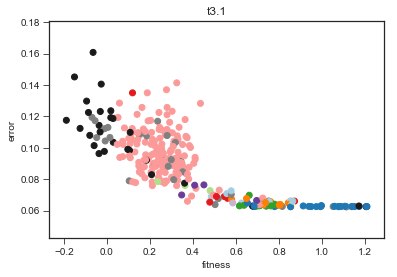

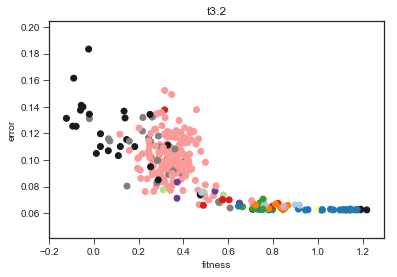

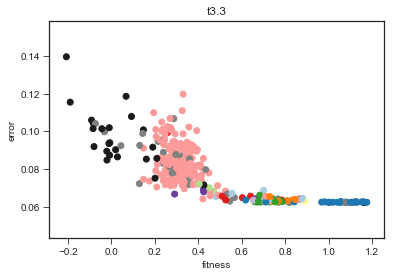

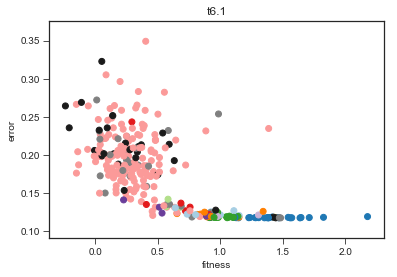

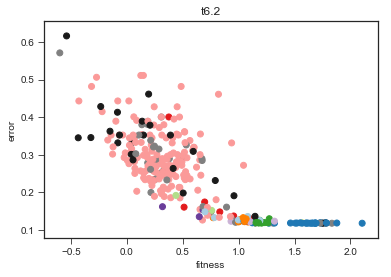

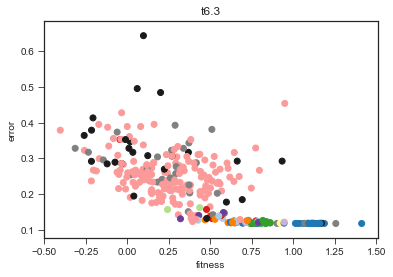

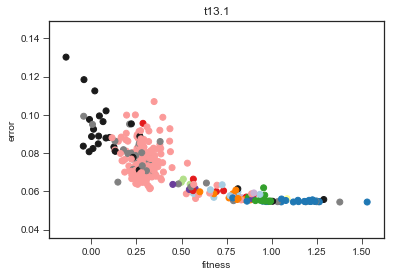

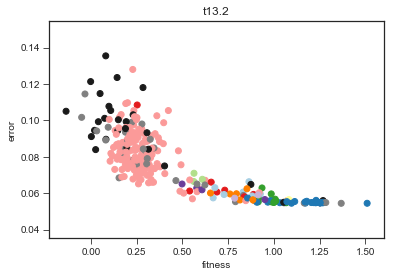

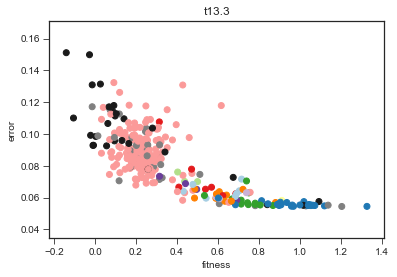

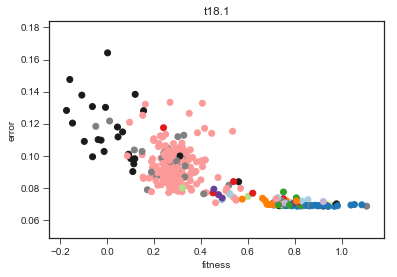

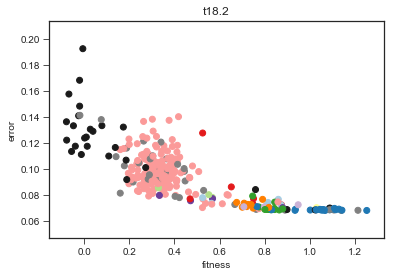

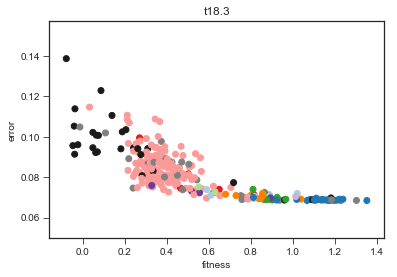

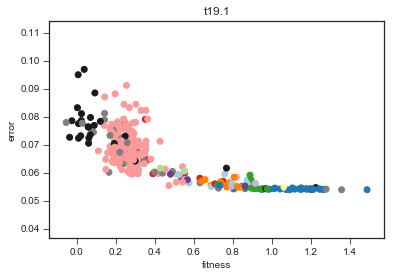

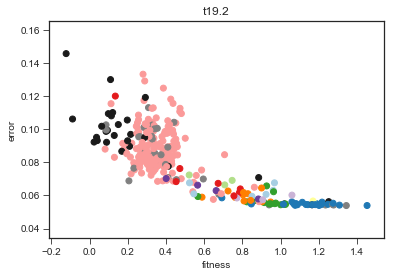

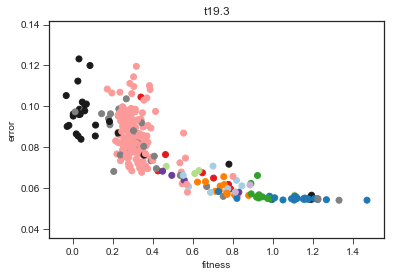

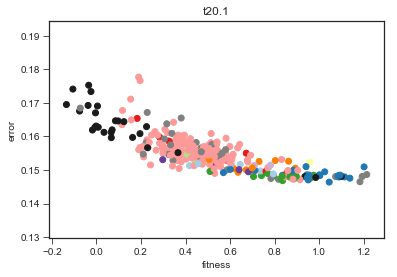

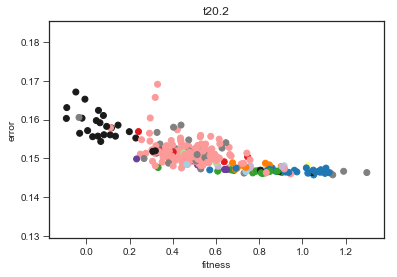

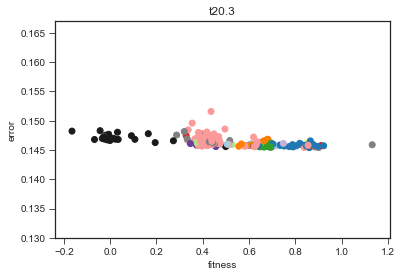

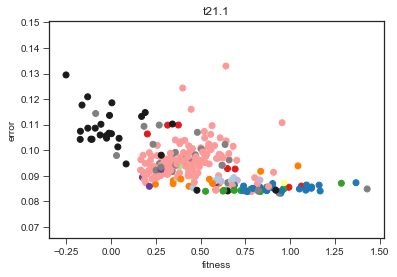

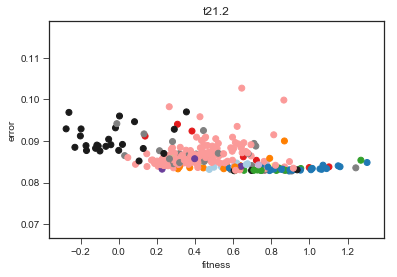

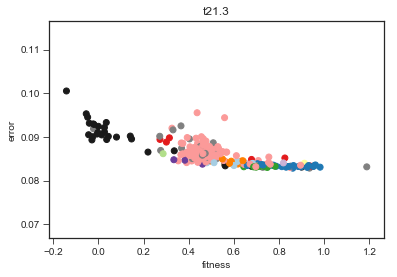

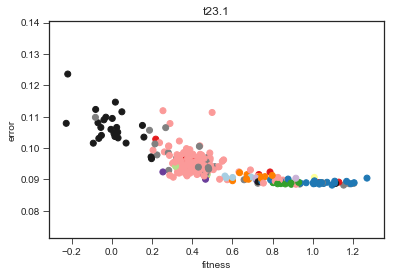

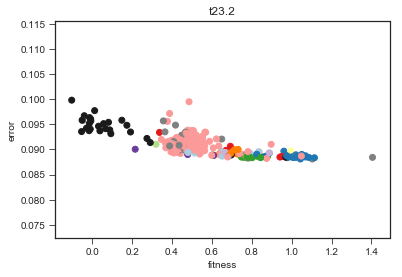

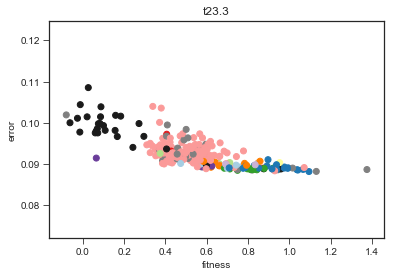

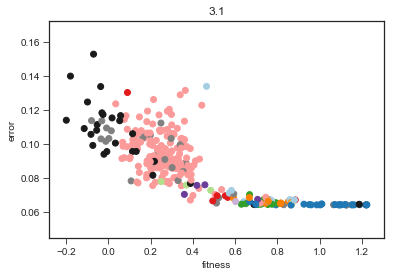

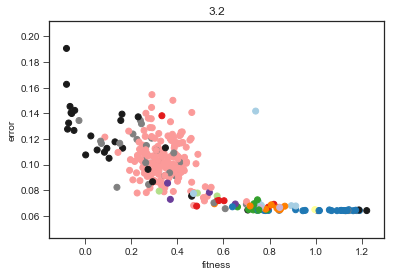

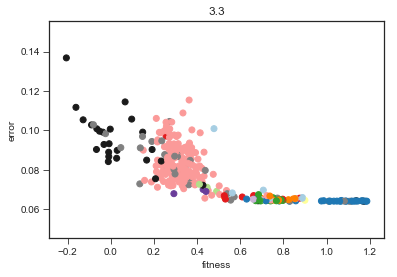

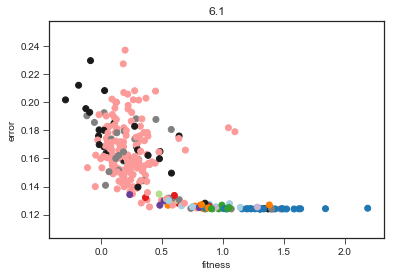

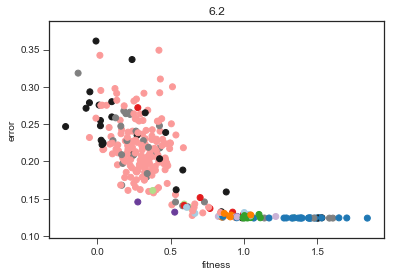

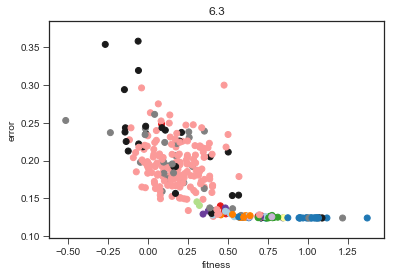

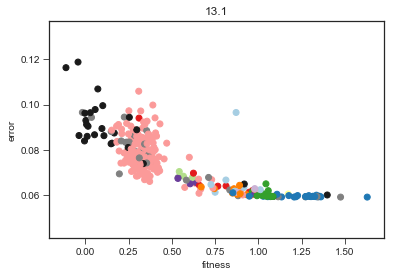

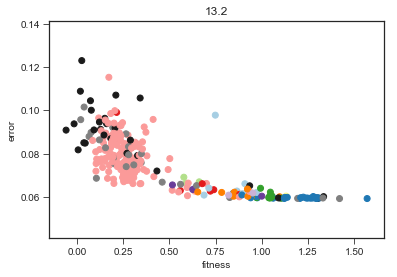

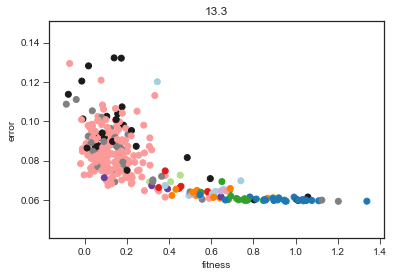

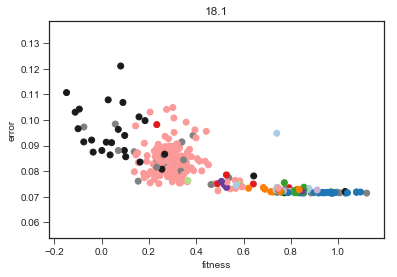

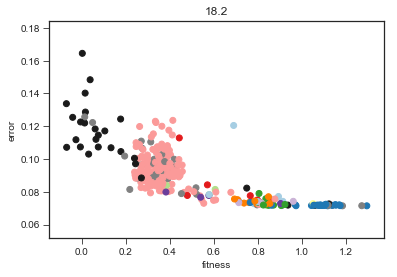

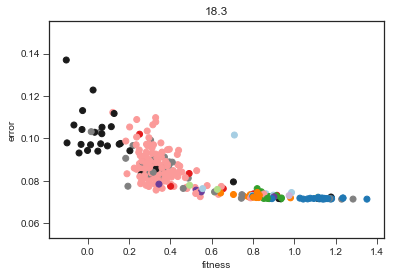

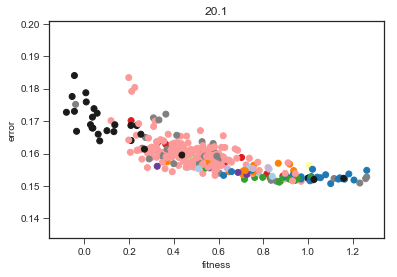

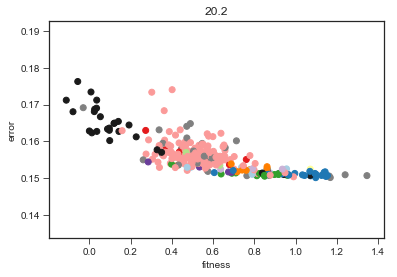

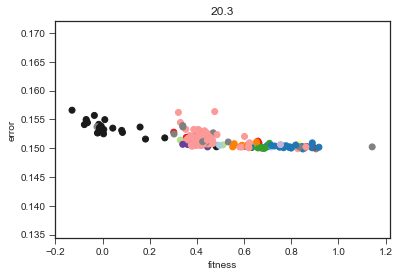

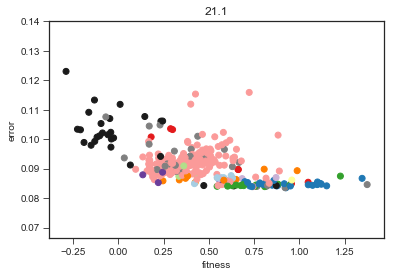

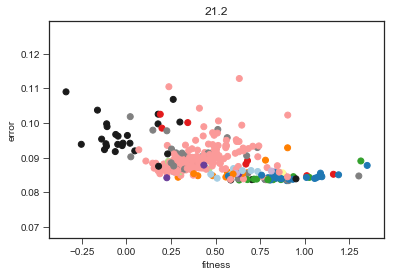

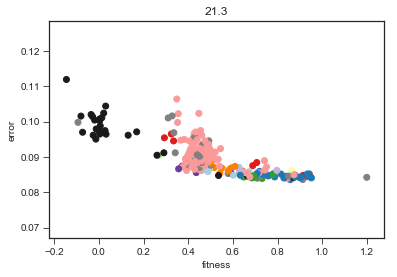

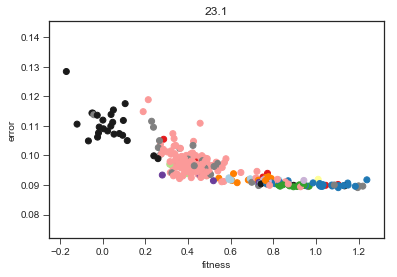

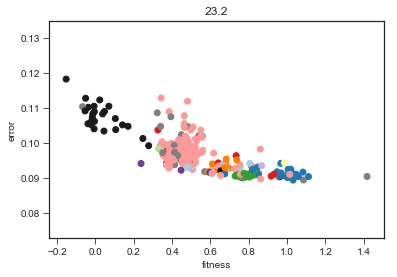

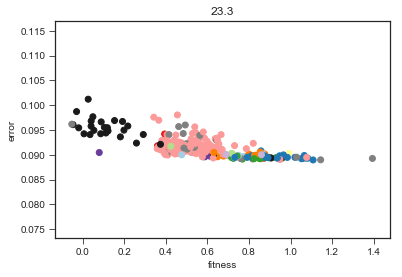

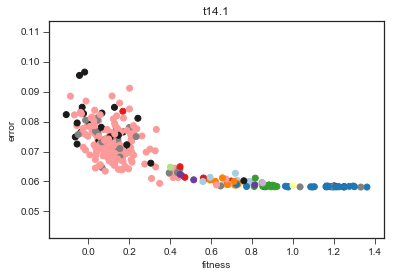

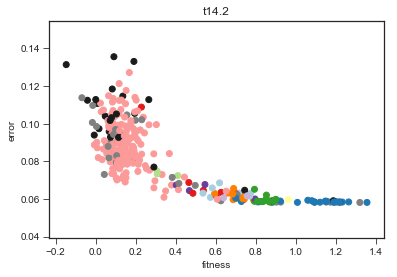

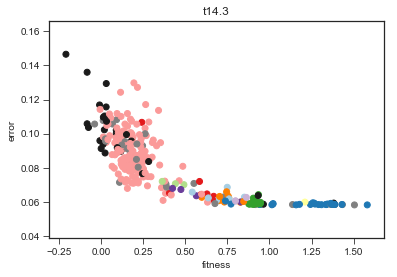

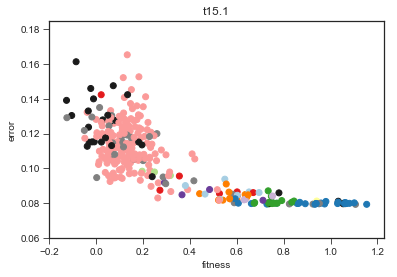

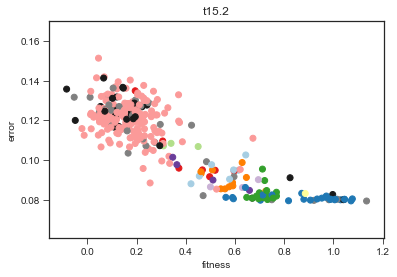

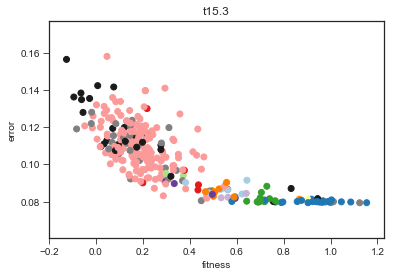

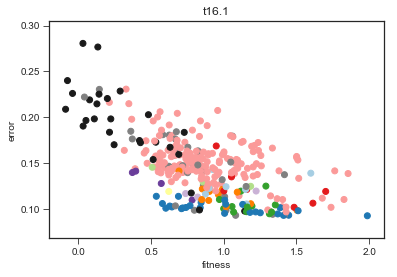

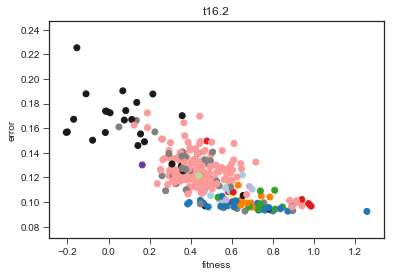

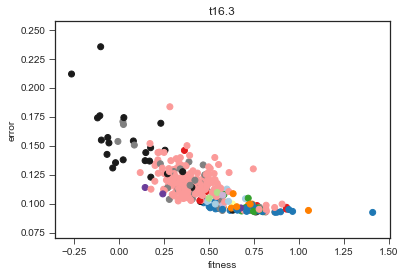

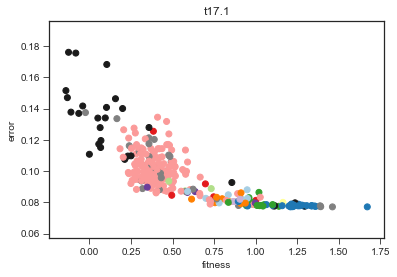

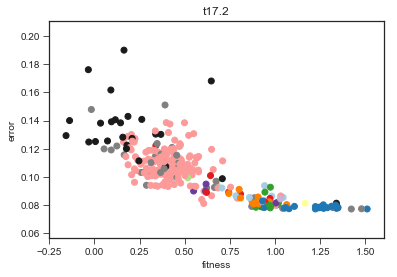

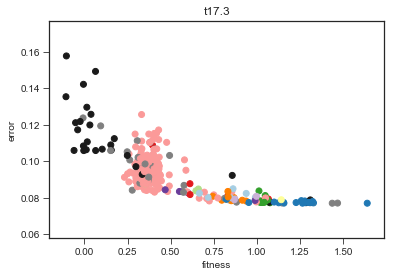

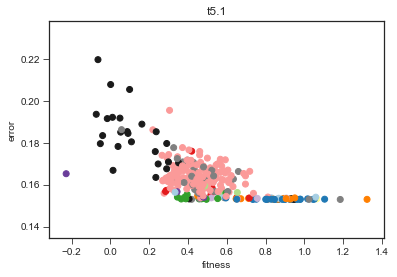

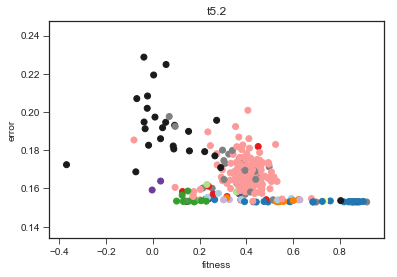

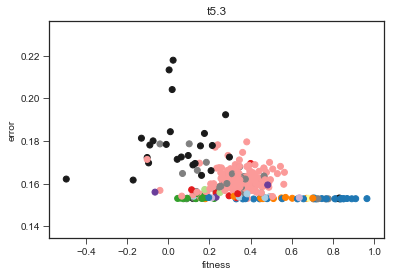

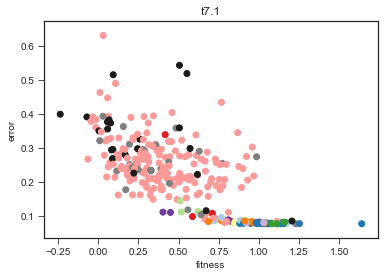

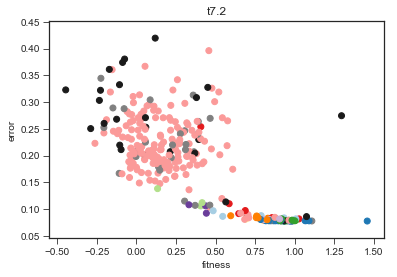

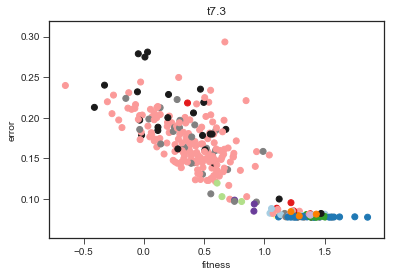

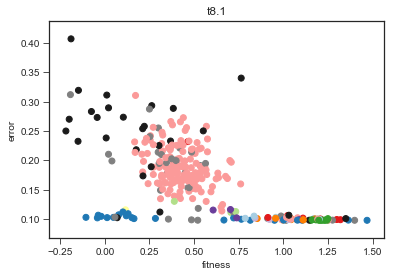

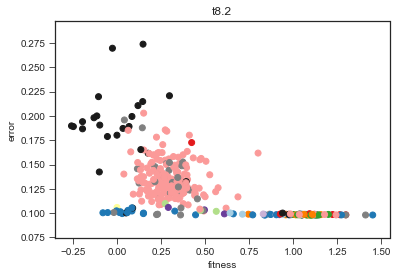

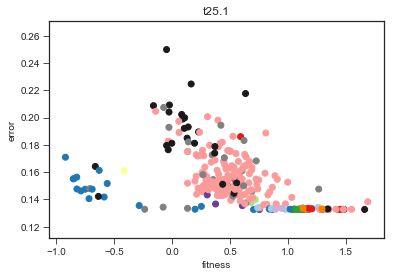

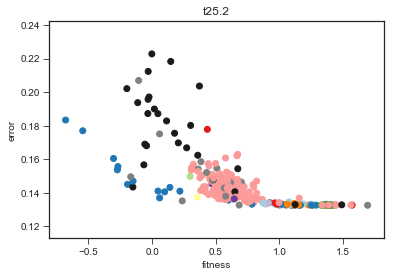

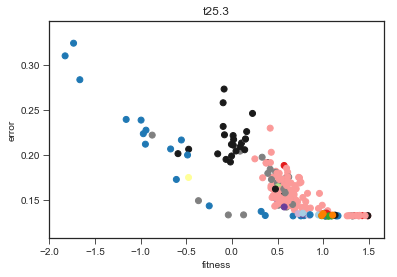

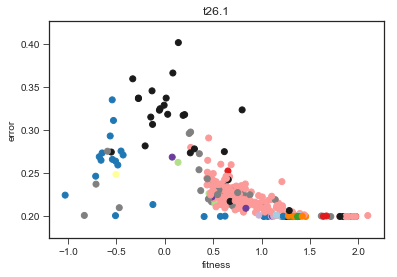

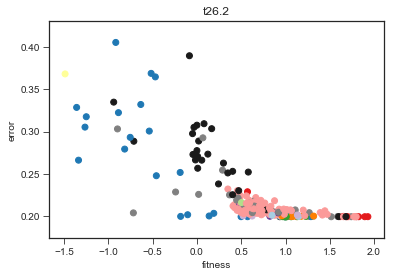

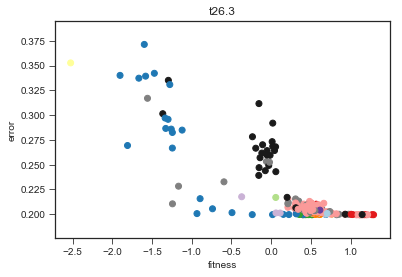

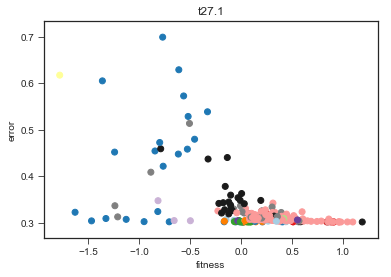

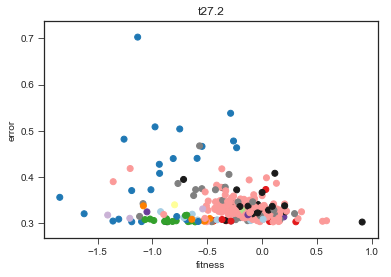

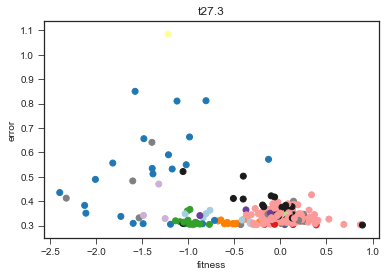

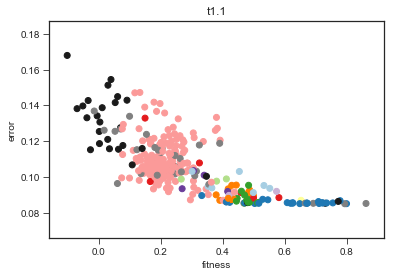

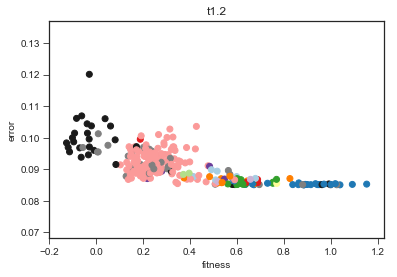

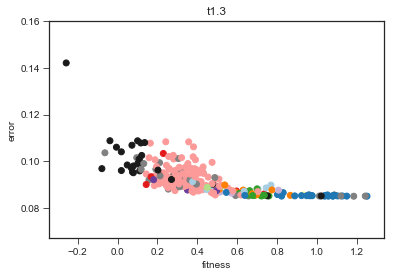

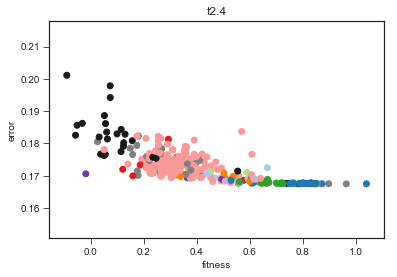

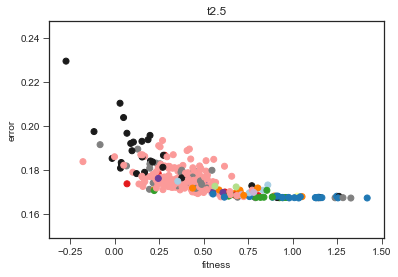

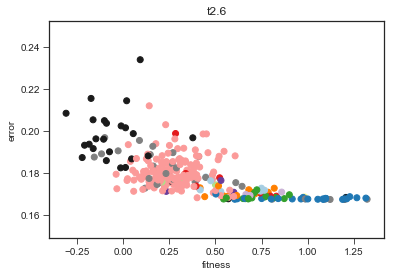

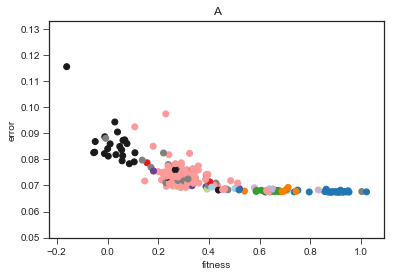

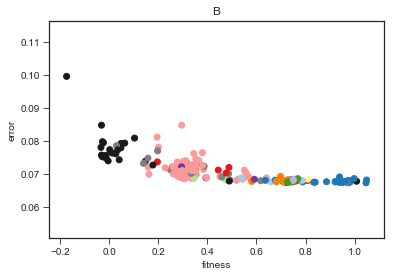

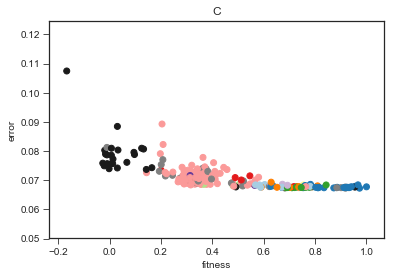

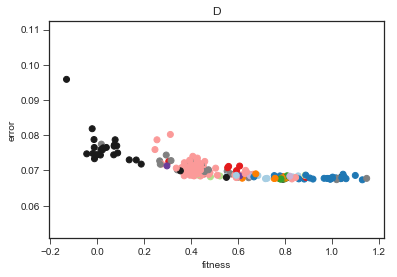

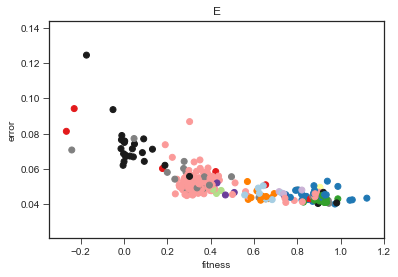

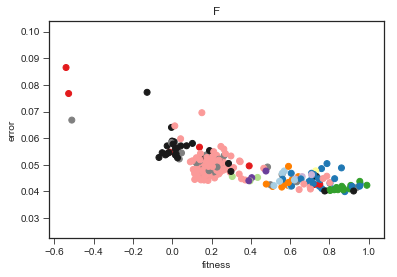

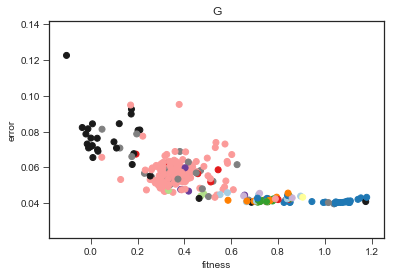

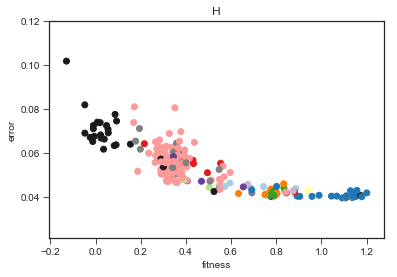

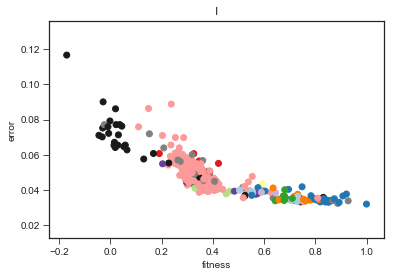

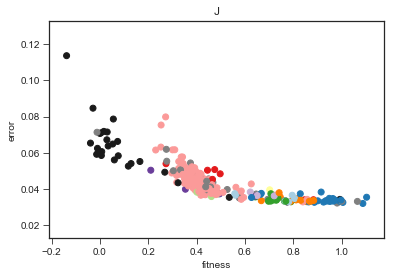

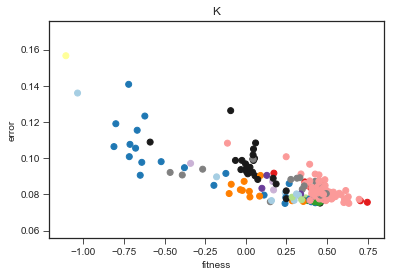

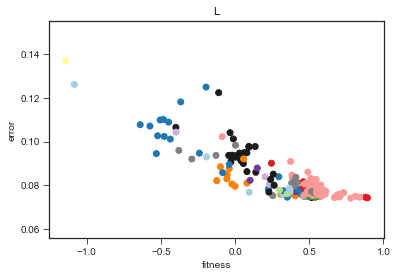

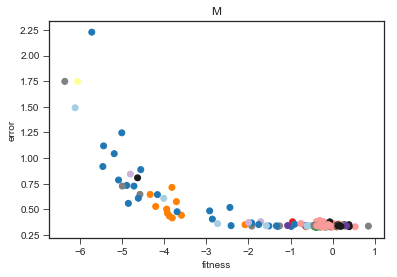

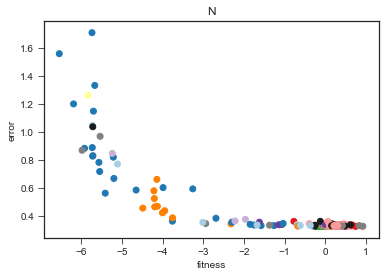

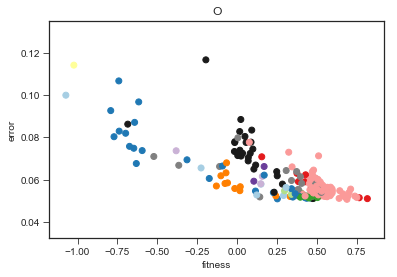

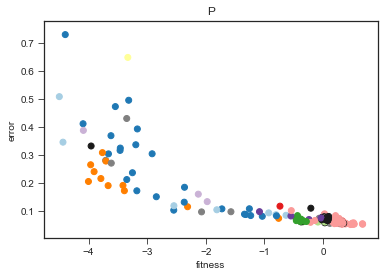

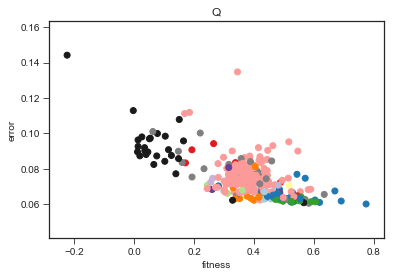

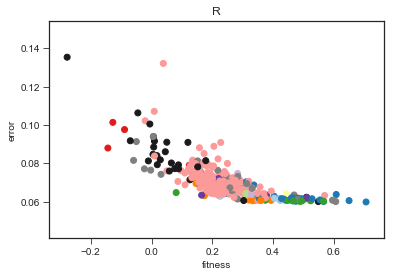

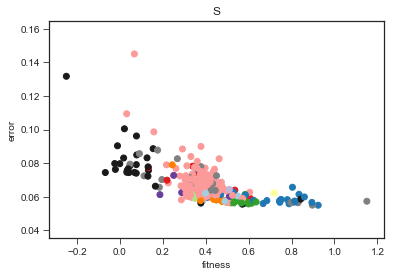

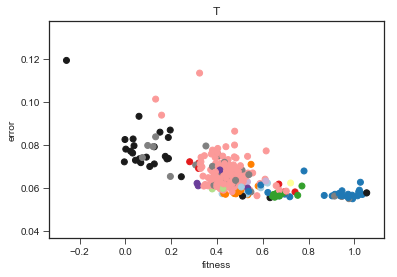

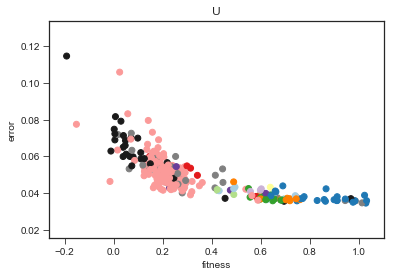

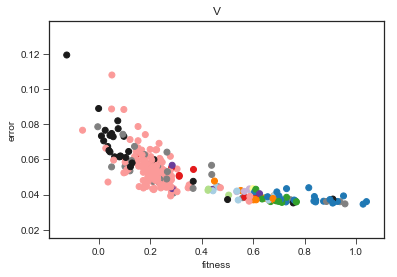

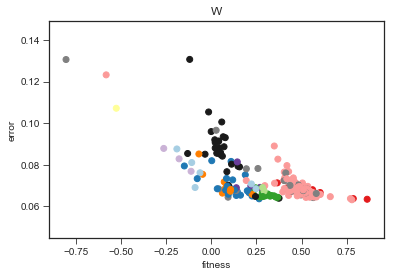

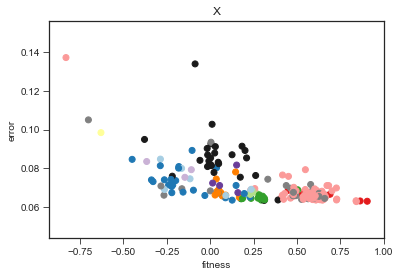

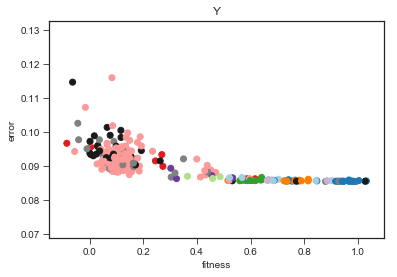

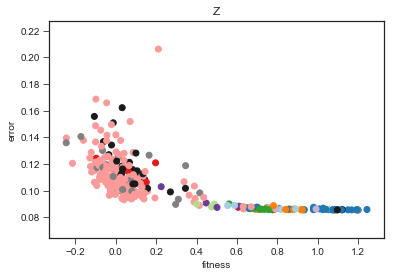

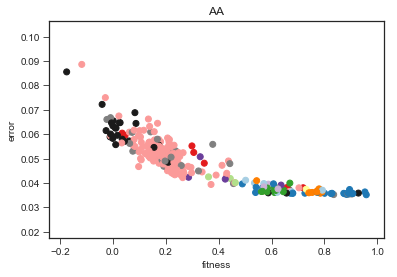

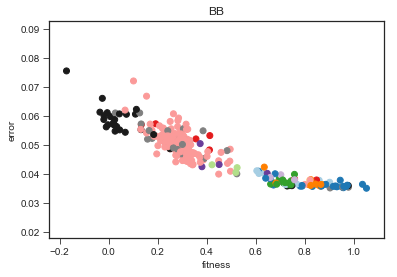

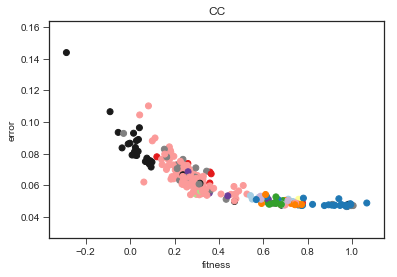

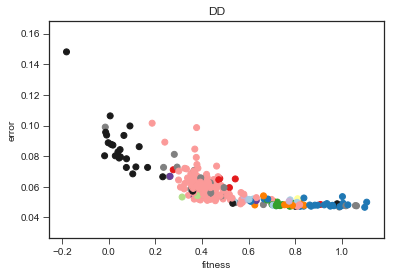

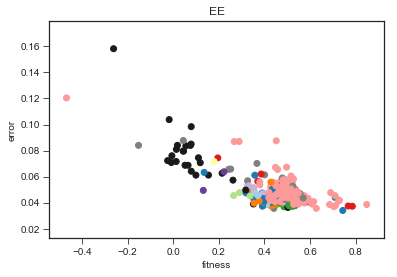

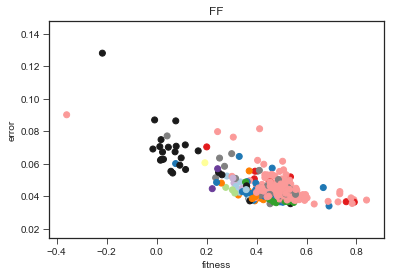

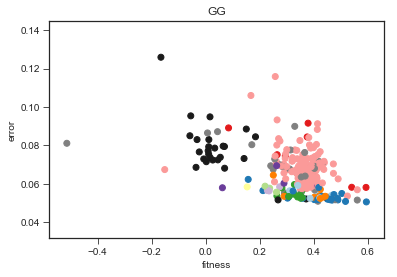

In [11]:
for rep in just_reps:
    plt.figure()
    this_condition = fitness_df
    plt.title(f'{rep}')
    plt.scatter(my_df[f'{rep}_fitness'],my_df[f'{rep}_error'],color=colors)
    
    plt.xlabel('fitness')
    plt.ylabel('error')



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


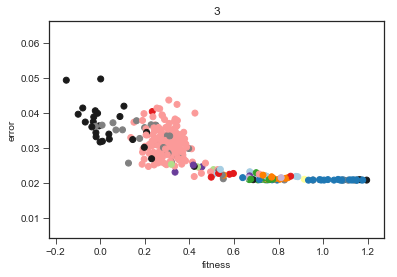

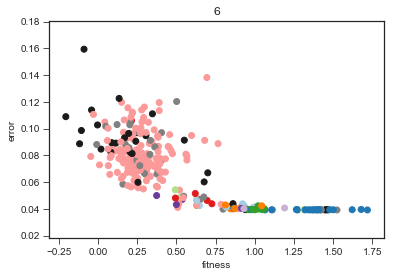

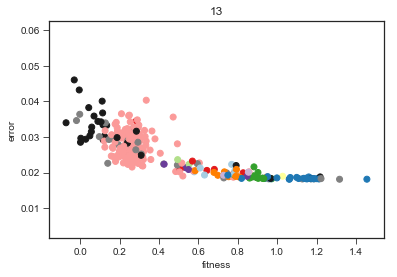

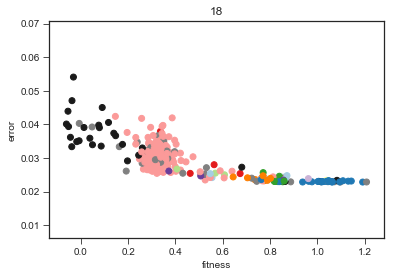

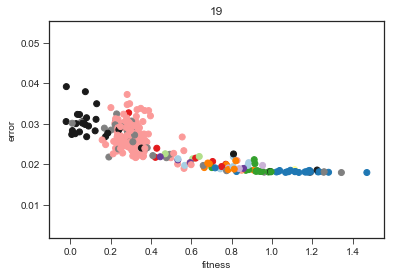

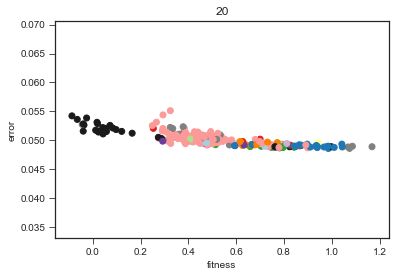

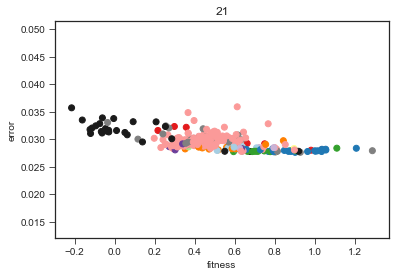

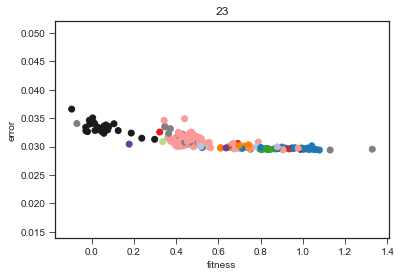

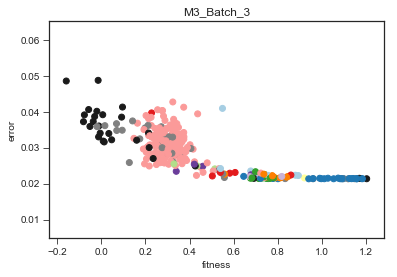

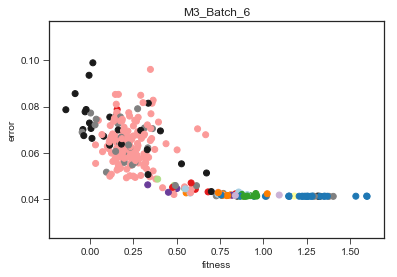

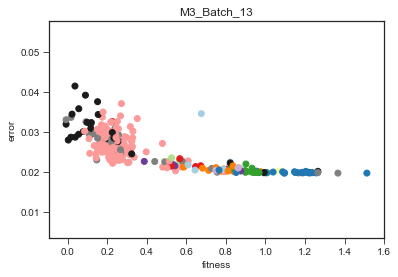

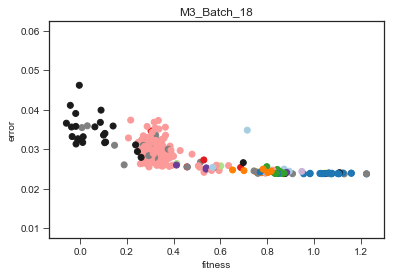

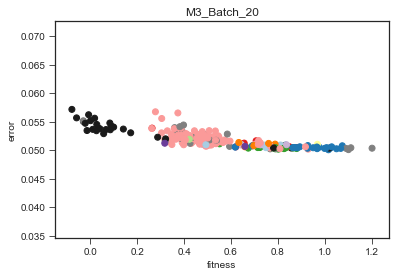

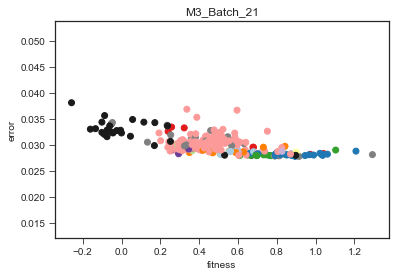

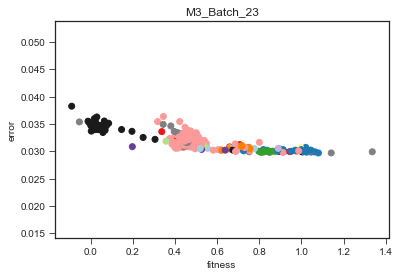

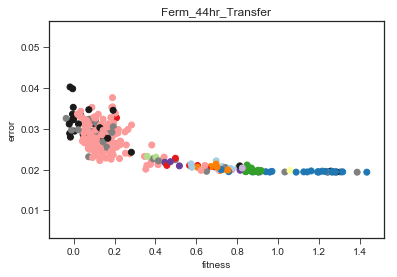

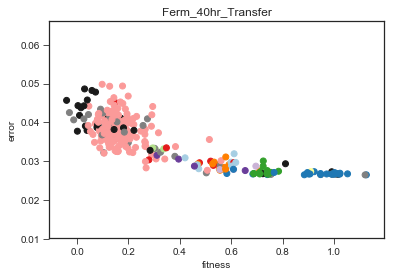

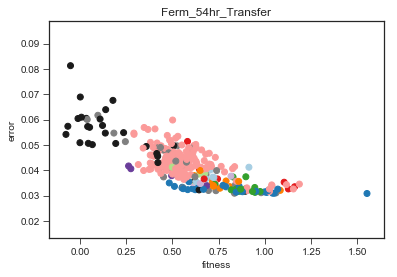

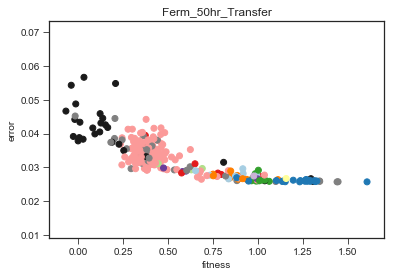

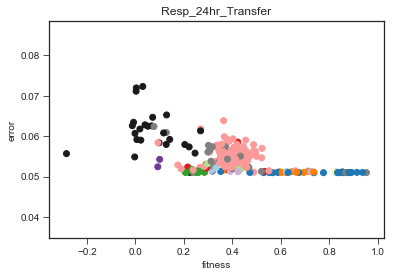

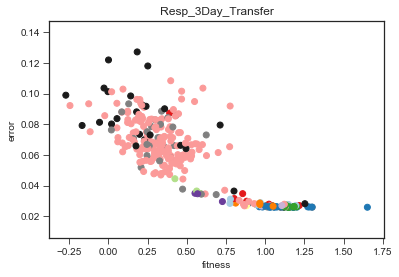

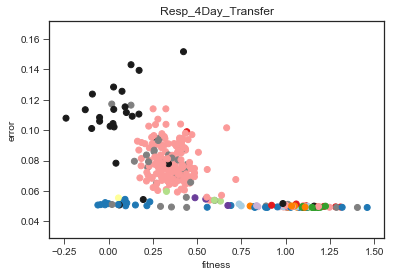

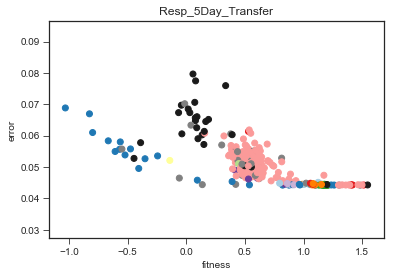

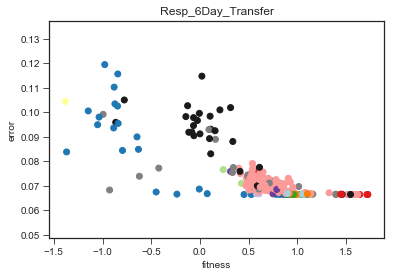

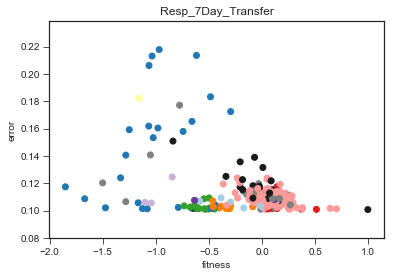

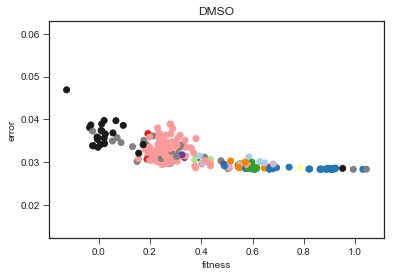

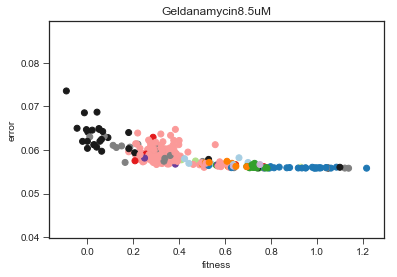

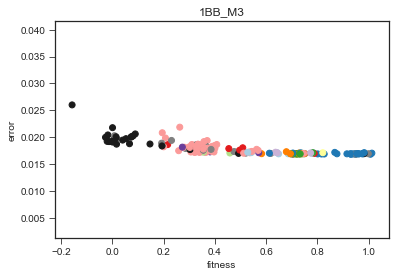

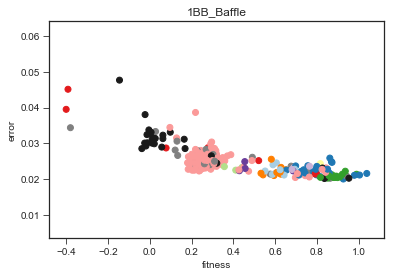

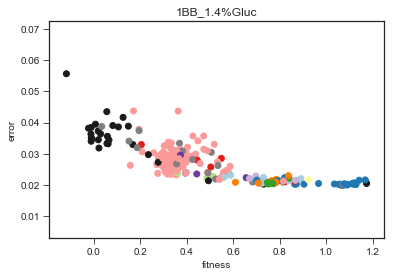

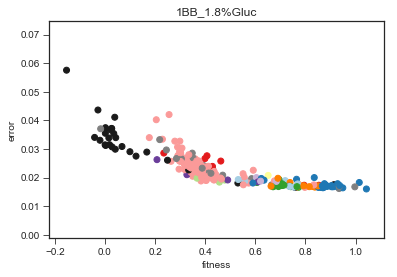

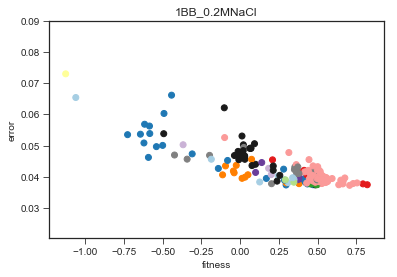

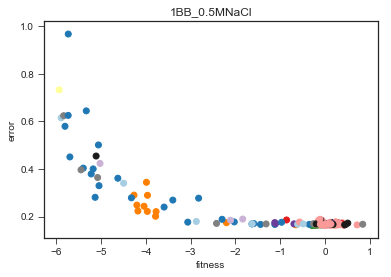

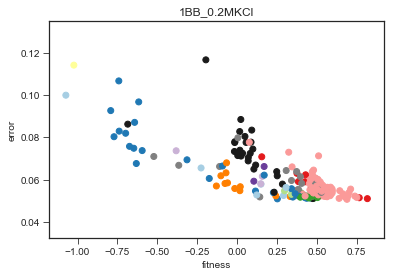

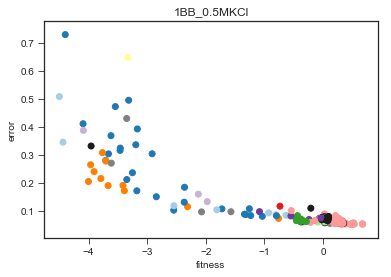

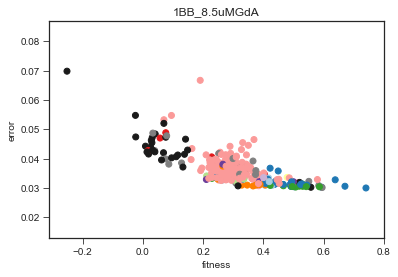

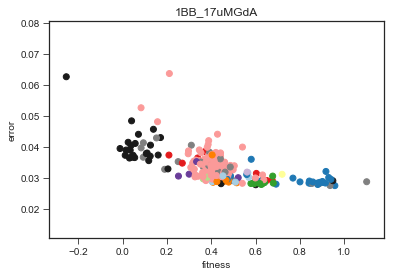

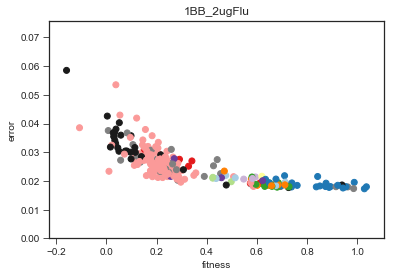

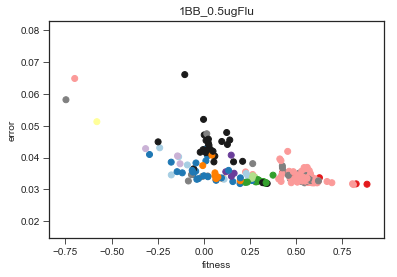

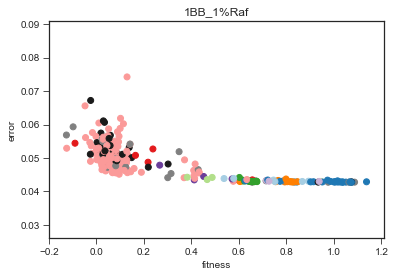

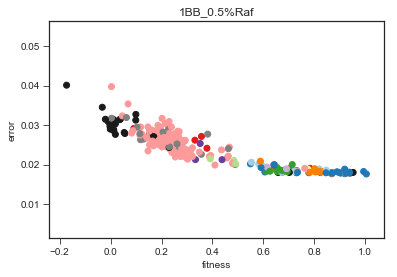

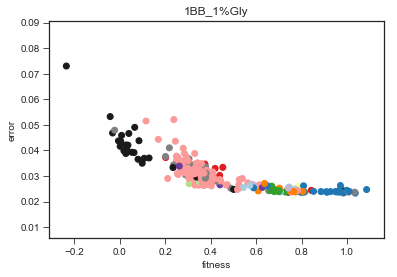

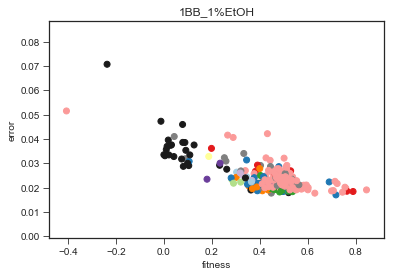

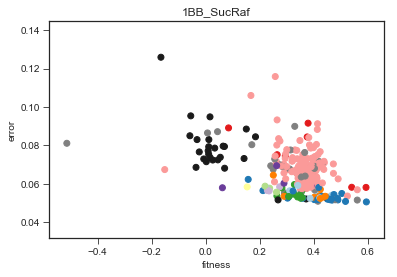

In [12]:
for condition in conditions:
    plt.figure()
    this_condition = fitness_df
    plt.title(f'{condition}')
    plt.scatter(my_df[f'{condition}_fitness'],my_df[f'{condition}_error'],color=colors)
    
    plt.xlabel('fitness')
    plt.ylabel('error')

In [17]:
import re

bigbatch_columns = [col for col in fitness_df.columns if re.split('_fitness|_error',col)[0] in list(bigbatch_conditions.keys())+['barcode','gene']]

In [17]:
fitness_df[bigbatch_columns].dropna()

barcode            gene  1BB_M3_fitness  1BB_M3_error  \
0         53         Diploid        0.349259         0.125   
1        151            IRA1        1.007577         0.125   
2        262    NotSequenced        0.344703         0.125   
3        273            IRA1        0.827609         0.125   
4        323    NotSequenced        0.756085         0.125   
5        415            IRA1        0.988022         0.125   
6        499    NotSequenced        0.000000         0.125   
7        622    NotSequenced        0.329384         0.125   
8        689            IRA1        1.022583         0.125   
9        697    NotSequenced        0.321022         0.125   
10      1185    NotSequenced        0.000000         0.125   
11      1322    NotSequenced        0.000000         0.125   
12      1379    NotSequenced        0.961642         0.125   
13      1488    NotSequenced        0.964540         0.125   
14      1564         Diploid        0.307970         0.125   
15      1617            PDE2        0.728691         0.125   
16      1641           other        0.076793         0.125   
17      1683           other        0.006800         0.125   
18      1866            PDE2        0.740677         0.125   
19      2037         Diploid        0.328808         0.125   
20      2039  Diploid + IRA2        0.393015         0.125   
21      2288            GPB2        0.746808         0.125   
22      2468            IRA2        0.795788         0.125   
23      2608            GPB1        0.499664         0.125   
24      2768            GPB2        0.708998         0.125   
25      2776         Diploid        0.367187         0.125   
26      2808         Diploid        0.472345         0.125   
27      3160    NotSequenced        0.517315         0.125   
28      3250    NotSequenced        0.339705         0.125   
29      3298    NotSequenced        0.000000         0.125   
..       ...             ...             ...           ...   
518   430247           other        0.000067         0.125   
519   433489    NotSequenced        0.000000         0.125   
520   434397         Diploid        0.324922         0.125   
521   454012    NotSequenced        0.205620         0.125   
522   454851           other        0.044587         0.125   
523   465343    NotSequenced        0.537683         0.125   
524   467348    NotSequenced        0.000000         0.125   
525   469646    NotSequenced        0.000000         0.125   
526   480412    NotSequenced        0.791221         0.125   
527   481885    NotSequenced        0.000000         0.125   
528   488655    NotSequenced        0.430724         0.125   
529   490448    NotSequenced        0.000000         0.125   
530  9000001            IRA1        0.674595         0.125   
531  9000002            IRA1        0.681502         0.125   
532  9000003            IRA1        0.689983         0.125   
533  9000005            IRA1        0.680884         0.125   
534  9000006            IRA1        0.692349         0.125   
535  9000007            IRA1        0.666434         0.125   
536  9000008            IRA1        0.673636         0.125   
537  9000009            IRA1        0.687453         0.125   
538  9000010            IRA1        0.702440         0.125   
539  9000101            IRA1        0.860423         0.125   
540  9000103            IRA1        0.954055         0.125   
541  9000104            IRA1        0.879110         0.125   
542  9000105            IRA1        0.867291         0.125   
543  9000106            IRA1        0.872156         0.125   
544  9000107            IRA1        0.778986         0.125   
545  9000108            IRA1        0.000000         0.125   
546  9000109            IRA1        0.857915         0.125   
547  9000110            IRA1        0.876397         0.125   

     1BB_Baffle_fitness  1BB_Baffle_error  1BB_1.4%Gluc_fitness  \
0              0.293607              0.25              0.356463   
1              0.981670   

In [18]:
my_df = fitness_df[bigbatch_columns].dropna()

spike_in_missense = [9000000 + i for i in range(11)]
spike_in_nonsense = [9000100 + i for i in range(11)]
gpb2s = [bc for bc in my_df[my_df['gene']=='GPB2']['barcode'].values]
pde2s = [bc for bc in my_df[my_df['gene']=='PDE2']['barcode'].values]
# diploids = [bc for bc in my_df[my_df['gene']=='Diploid']['barcode'].values]

# classes = [spike_in_missense,spike_in_nonsense,gpb2s,pde2s,diploids]
# class_names = ['Missense','Nonsense','GPB2','PDE2','Diploid']
# class_colors = ['b','r','g','orange',tools.mutant_colorset['Diploid']]

classes = [spike_in_missense,spike_in_nonsense,gpb2s,pde2s]
class_names = ['Missense','Nonsense','GPB2','PDE2']
class_colors = ['b','r','g','orange']

classes = [spike_in_missense,spike_in_nonsense,gpb2s]
class_names = ['Missense','Nonsense','GPB2']
class_colors = ['b','r','g']




/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


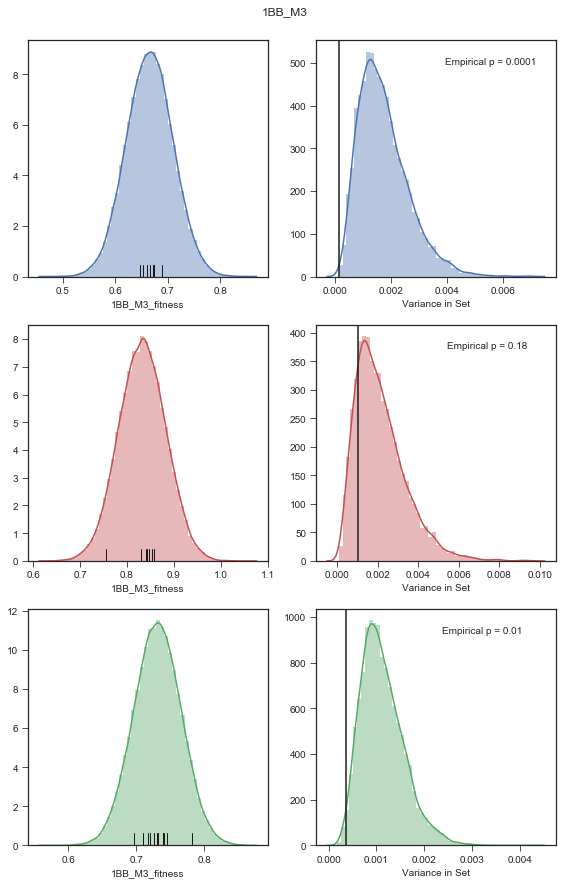

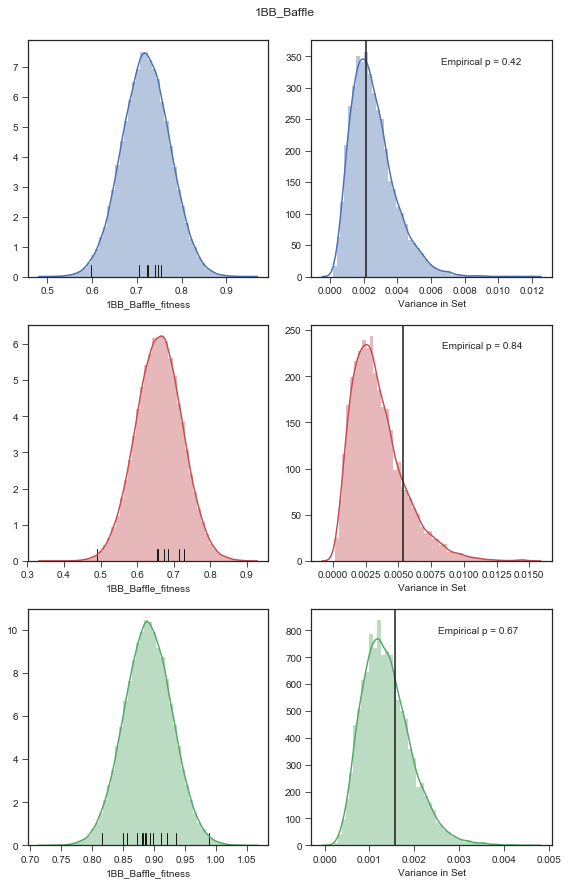

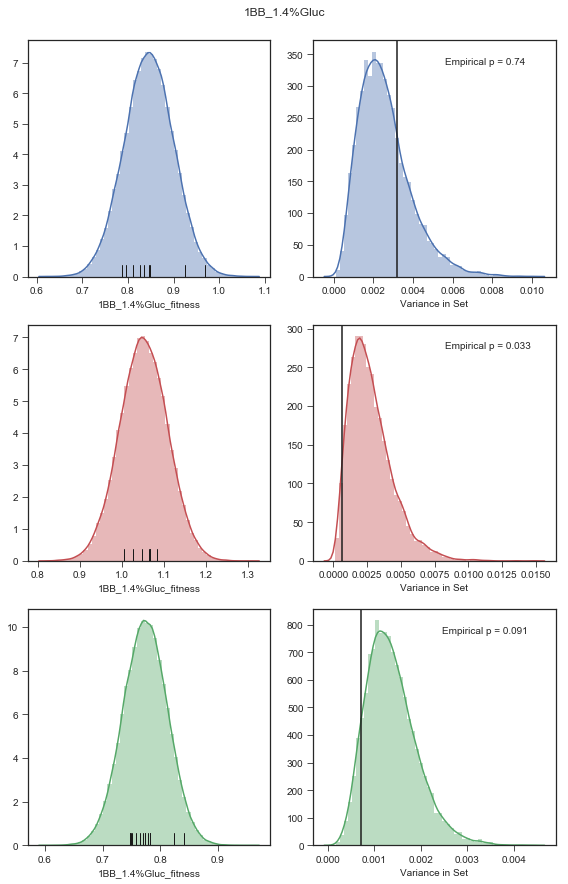

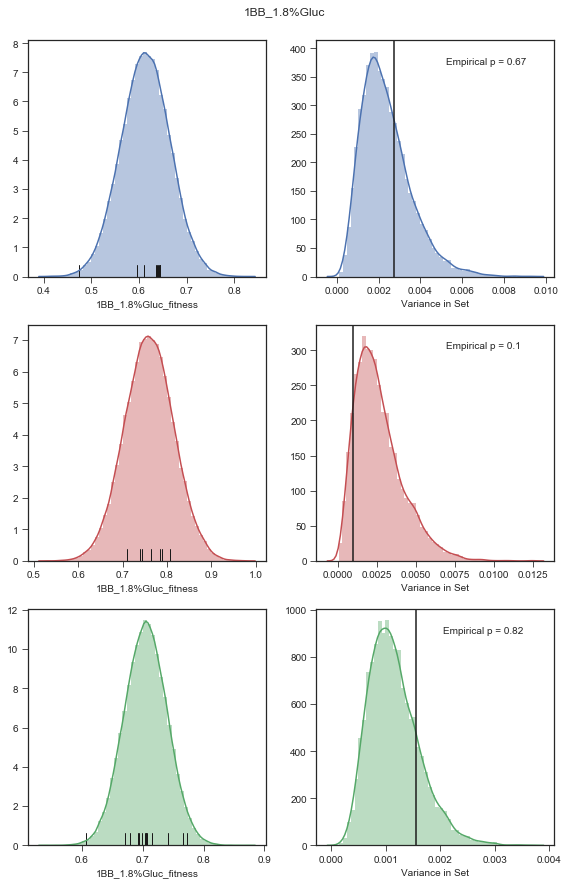

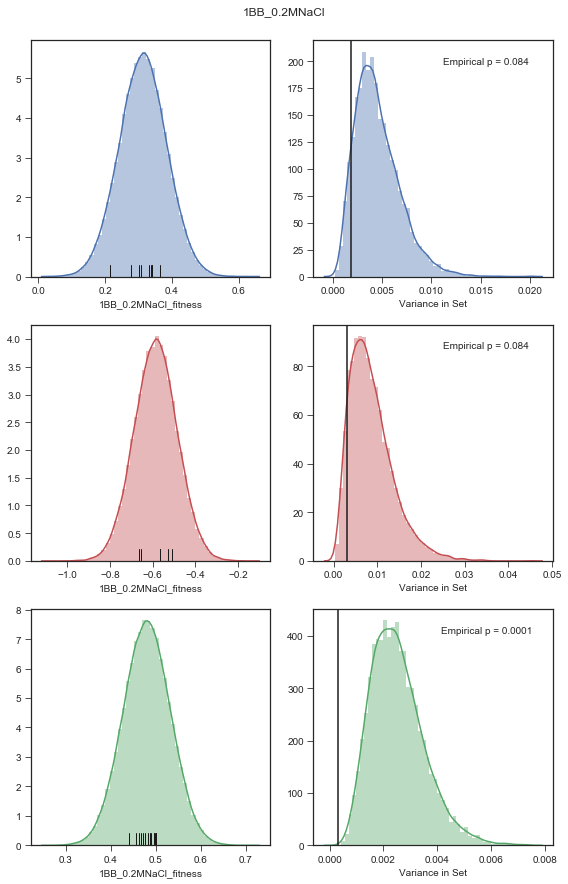

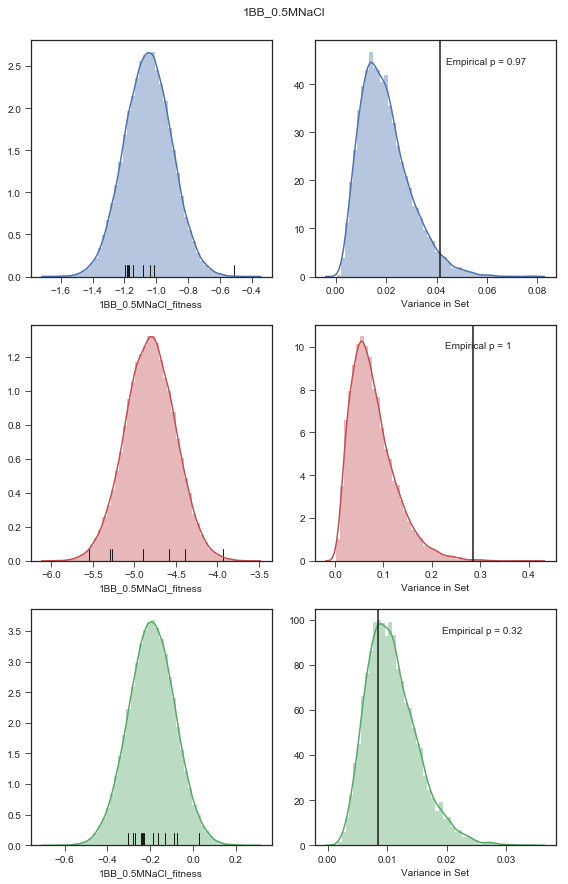

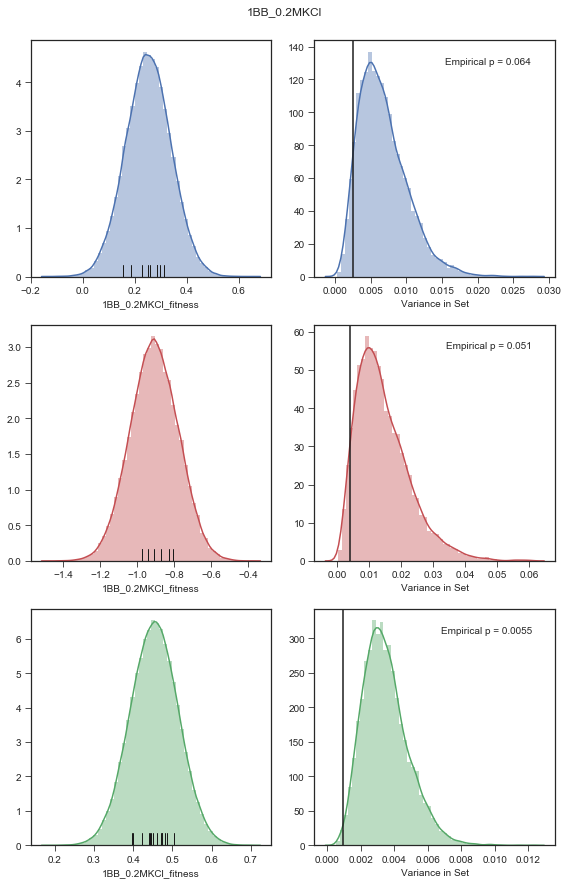

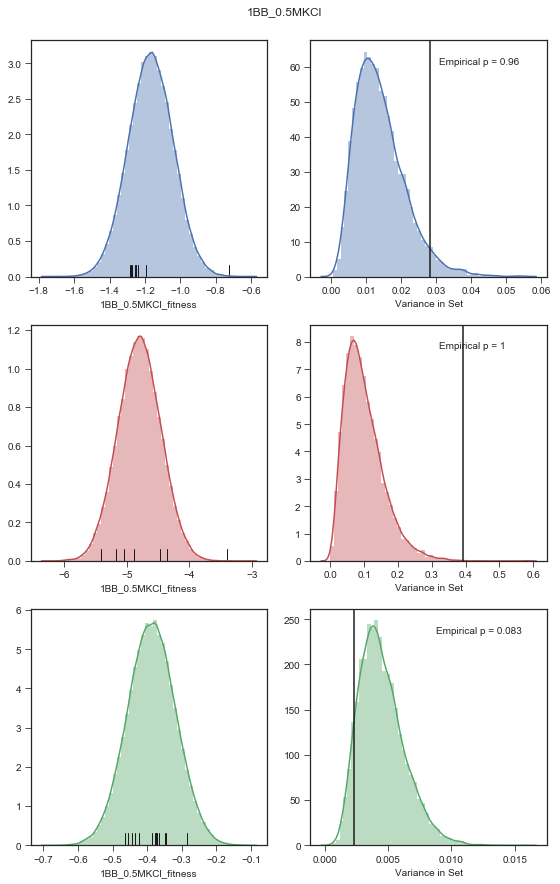

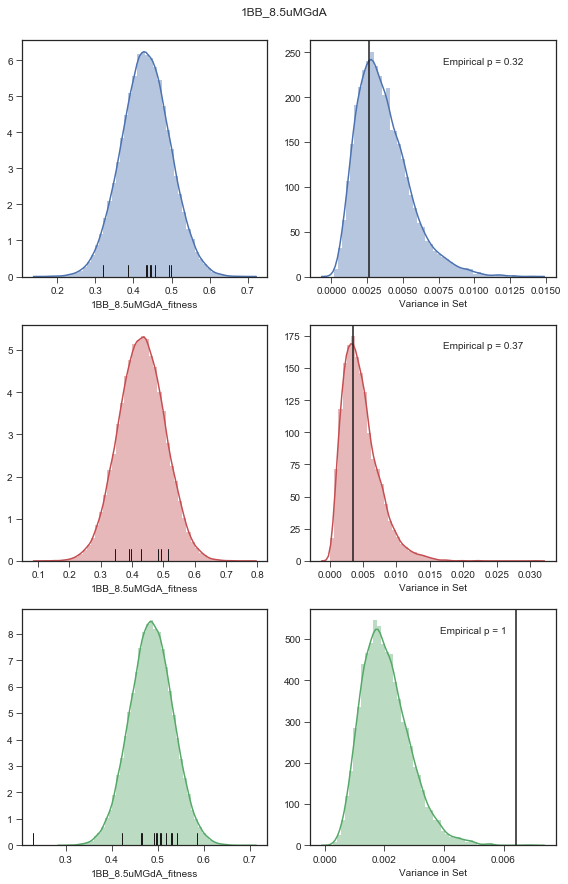

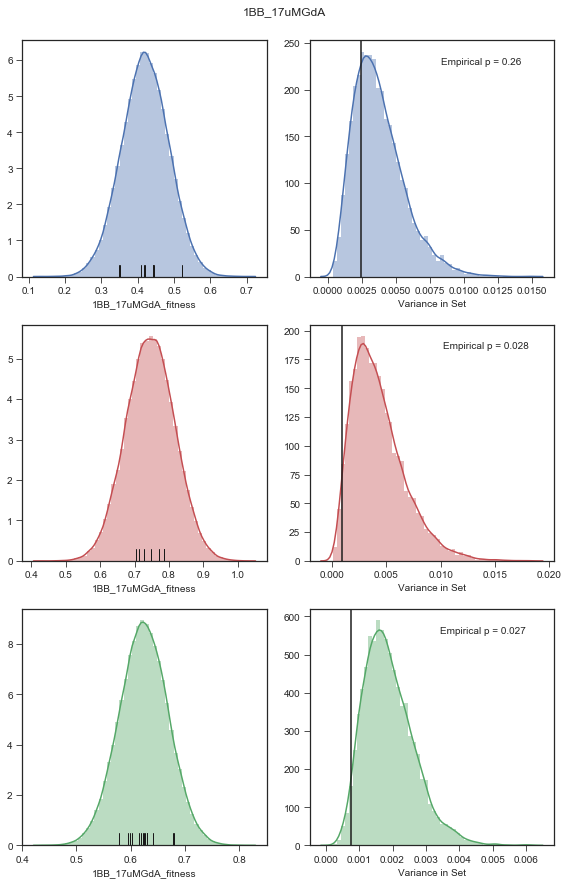

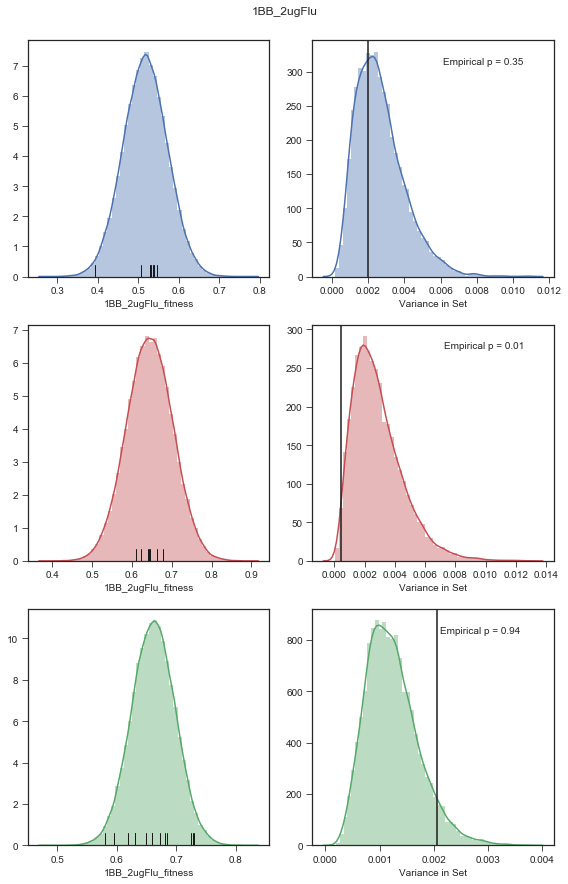

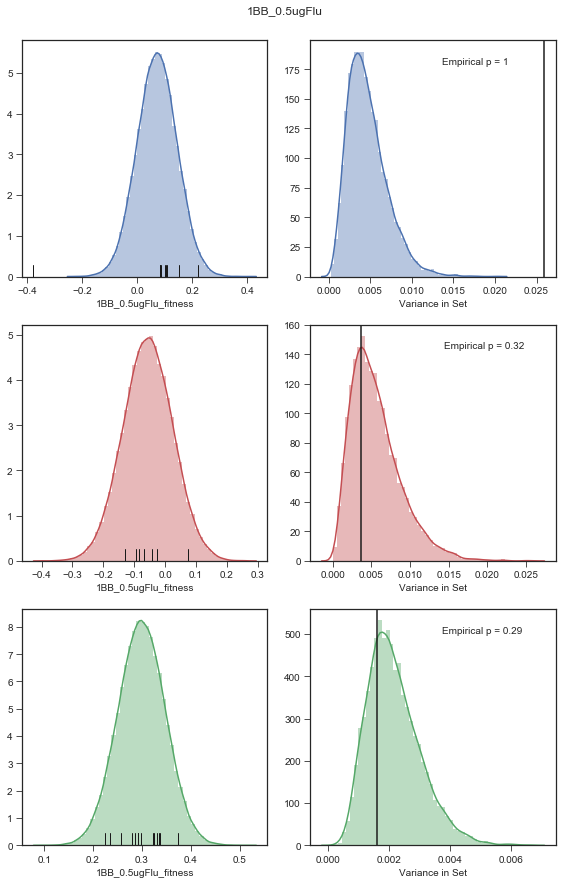

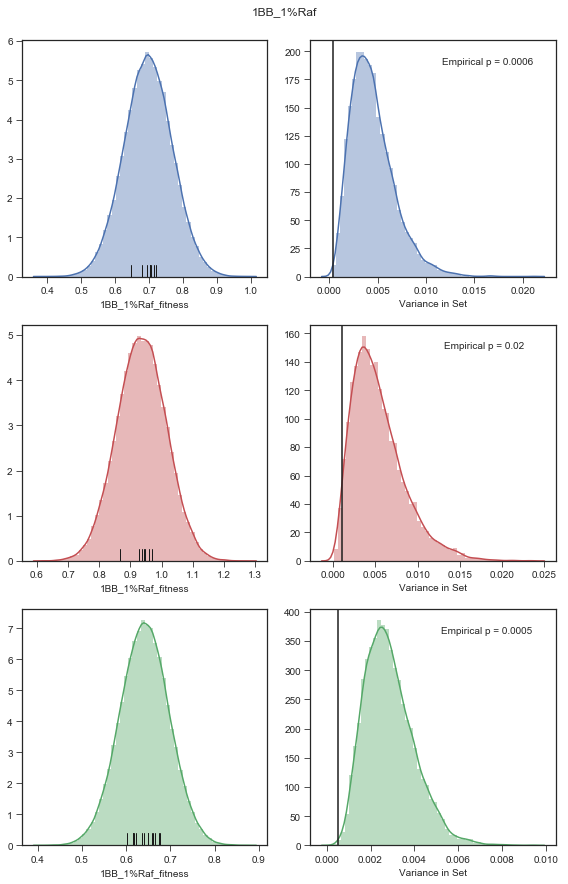

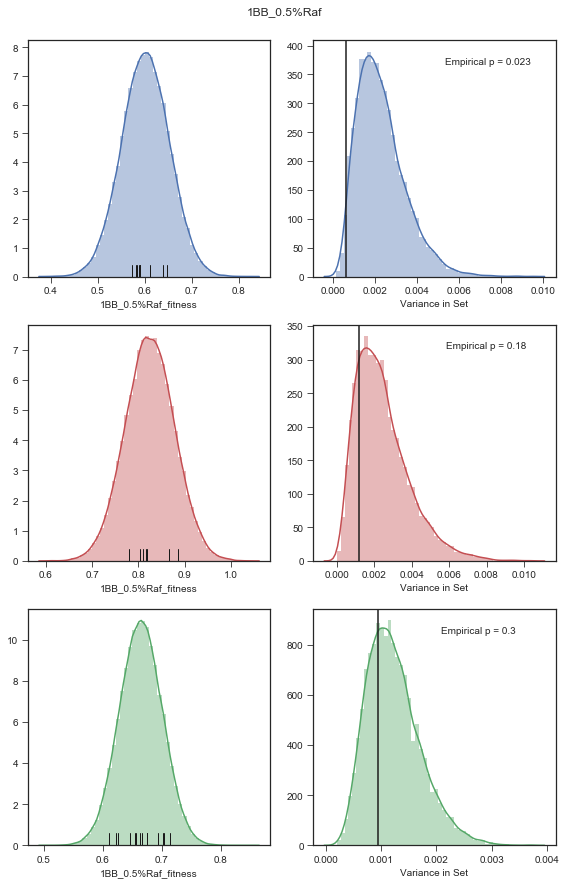

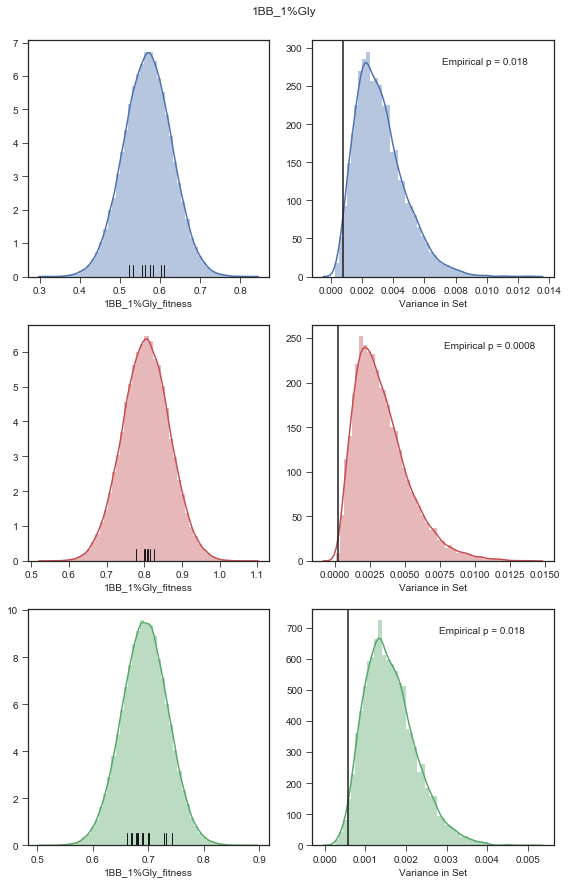

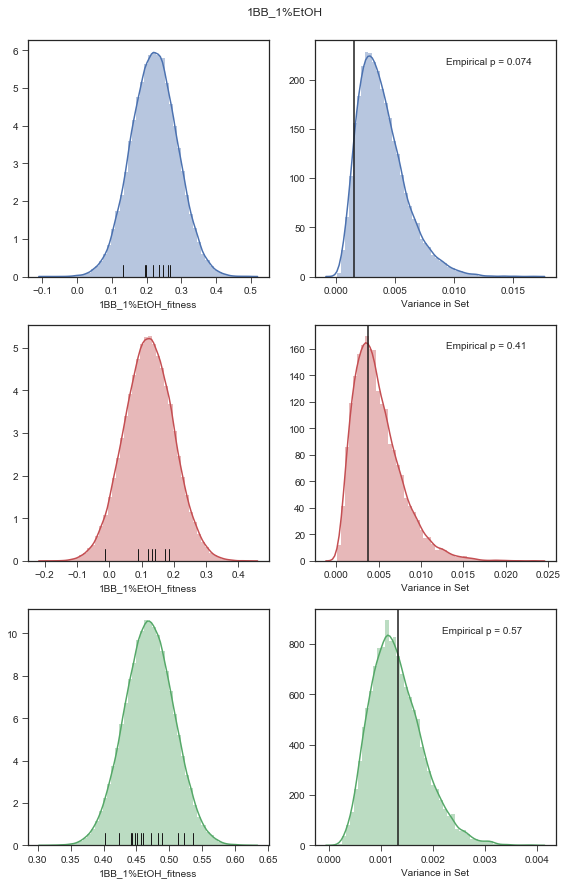

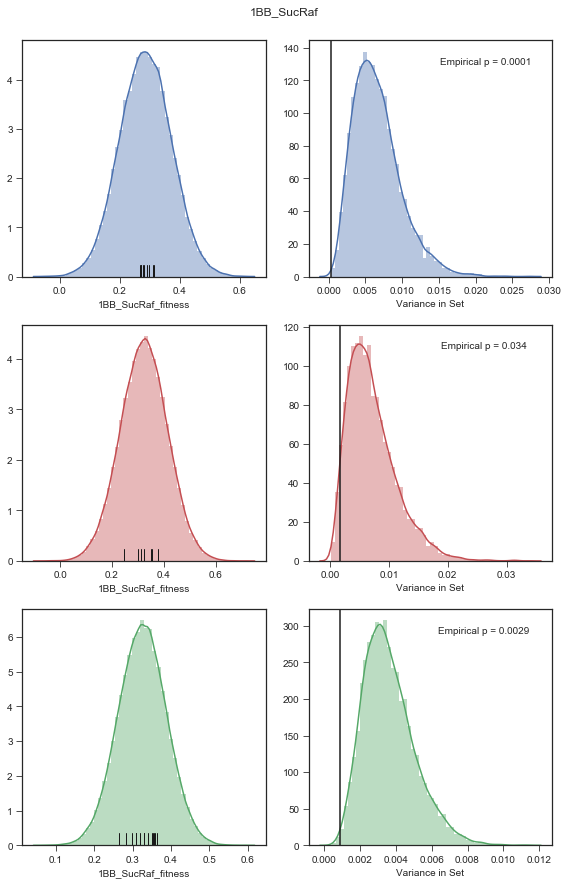

In [36]:
my_df = fitness_df[bigbatch_columns].dropna()

n_samples = 10000
n_classes = len(classes)

pvals = {}
for t,condition in enumerate(list(bigbatch_conditions.keys())):
    plt.figure(figsize=(2*4,n_classes*4))
    plt.suptitle(condition,y=1.02)
    for c,this_class in enumerate(classes):
        
        this_set = my_df[my_df['barcode'].isin(this_class)]

        point_variance = np.var(this_set[f'{condition}_fitness'])
        aggregate_mean, aggregate_variance = tools.inverse_variance_mean(this_set[f'{condition}_fitness'],this_set[f'{condition}_error'])

        sampled_variances = []
        n_bcs = len(this_set[f'{condition}_fitness'])

        all_samples = np.random.normal(aggregate_mean,np.sqrt(aggregate_variance),n_samples*n_bcs)
        sampled_variances = [np.var(all_samples[this_counter*n_bcs:(this_counter+1)*n_bcs]) for this_counter in range(n_samples)]

        plt.subplot(n_classes,2,2*c+1)
#         if c == 0:
#             plt.title('Distribution of Fitness values')

        sns.distplot(this_set[f'{condition}_fitness'],rug=True, hist=False,kde=False,color='k')
        sns.distplot(all_samples,color=class_colors[c],label='Expected Distribution from Noise')
        
        ymin,ymax = plt.ylim()
        xmin,xmax = plt.xlim()
        
#         plt.legend(labels=['_nolabel_']*(len(this_class)-1)+['Estimated Fitness Values','Expected Distribution from Noise'])
#         plt.text(s=f'{class_names[c]}',x=1.1*xmin,y=1.1*ymin)
        
        plt.subplot(n_classes,2,2*c+2)
#         if c == 0:
#             plt.title()

        sns.distplot(sampled_variances,color=class_colors[c],label='Variance across samples')
        plt.axvline(point_variance,color='k',label='Variance across estimates')
#         plt.legend()

        # calculate 1 sided empirical p_value (Proportion of samples with less variance than the real sample)
        empirical_p_value = max(1.0/n_samples,len(np.where(sampled_variances < point_variance)[0])/n_samples)
        
        if t == 0:
            pvals[f'{class_names[c]}'] = [empirical_p_value]
        else:
            pvals[f'{class_names[c]}'].append(empirical_p_value)

        ymin,ymax = plt.ylim()
        xmin,xmax = plt.xlim()
        
        
        plt.text(s=f'Empirical p = {empirical_p_value:.2g}',x=0.5*xmax,y=0.9*ymax)
        plt.xlabel('Variance in Set')
        
        
        plt.tight_layout()

#     plt.savefig(f'../figures/noise_model_figures/{condition}_noisecheck.pdf',bbox_inches='tight')
    

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Empirical P-value')

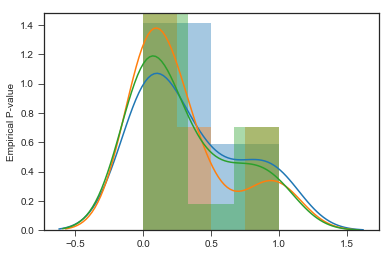

In [58]:
conditions = list(bigbatch_conditions.keys())
plt.figure()
for c,this_class in enumerate(class_names):
#     plt.axhline(0.05,color='k',linestyle='--',alpha=0.3)
#     plt.plot(pvals[this_class],'o',color=class_colors[c],alpha=0.4,label=this_class)
    sns.distplot(pvals[this_class])
plt.ylabel('Empirical P-value')
# plt.legend(loc=(1.0,0.5))
# plt.yscale('log')
# plt.xticks(range(len(conditions)),conditions,rotation=90)
# plt.savefig(f'../figures/noise_model_figures/noisecheck_all_pvals_logscale.pdf',bbox_inches='tight')
    
        

Note that SucRaf only has a single replicate and we seem to be overestimating the uncertainty in measurment - is this because the default alpha value is set too high? What empirical alpha values are we getting from 1BigBatch experiments? Is it reasonable to assume that alpha values hold across experiments? 

We can test this by comparing the inferred alpha values from 1 Big Batch with those of other batch conditions.

Additional Q: is it better to use weighted or unweighted average (of timepoints, etc.)? How do we determine which is better?

In [1]:
my_df = fitness_df.dropna()
    
for rep in just_reps:
    plt.figure()
    plt.scatter(my_df[f'{rep}_fitness'],my_df[f'{rep}_error'])

NameError: name 'fitness_df' is not defined

In [29]:
just_reps

['t3.1',
 't3.2',
 't3.3',
 't6.1',
 't6.2',
 't6.3',
 't13.1',
 't13.2',
 't13.3',
 't18.1',
 't18.2',
 't18.3',
 't19.1',
 't19.2',
 't19.3',
 't20.1',
 't20.2',
 't20.3',
 't21.1',
 't21.2',
 't21.3',
 't23.1',
 't23.2',
 't23.3',
 '3.1',
 '3.2',
 '3.3',
 '6.1',
 '6.2',
 '6.3',
 '13.1',
 '13.2',
 '13.3',
 '18.1',
 '18.2',
 '18.3',
 '20.1',
 '20.2',
 '20.3',
 '21.1',
 '21.2',
 '21.3',
 '23.1',
 '23.2',
 '23.3',
 't14.1',
 't14.2',
 't14.3',
 't15.1',
 't15.2',
 't15.3',
 't16.1',
 't16.2',
 't16.3',
 't17.1',
 't17.2',
 't17.3',
 't5.1',
 't5.2',
 't5.3',
 't7.1',
 't7.2',
 't7.3',
 't8.1',
 't8.2',
 't25.1',
 't25.2',
 't25.3',
 't26.1',
 't26.2',
 't26.3',
 't27.1',
 't27.2',
 't27.3',
 't1.1',
 't1.2',
 't1.3',
 't2.4',
 't2.5',
 't2.6',
 '1.4%-R1',
 '1.4%-R2',
 '1.5%-R1',
 '1.5%-R2',
 '1.6%-R1',
 '1.6%-R2',
 '1.7%-R1',
 '1.7%-R2',
 '1.8%-R1',
 '1.8%-R2',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 

In [34]:
len(just_reps)-33


90

In [ ]:
data = merged_data
data = data[~(data['barcode'].isin([7777777,9999999]))]

plt.figure(figsize=(5*9,5*14))
for counter,rep in enumerate(just_reps):
    print(rep)
#     if rep in  tools.flatten([i for i in bigbatch_conditions.values()]):
#         counter = counter + 6
#         if counter-26 >= 9:
#             counter += 1
#         if counter-26 >= 18:
#             counter += 1
    ax = plt.subplot(14,9,counter+1)
    timepoints = []
    these_times = []
    if rep in tools.flatten([i for i in old_conditions.values()]):
        
        if '%' in rep or 'Ben' in rep:
            e,r = rep.split('-')
            if e+'-T0' in data.columns:
                these_times.append(e+'-T0')
                timepoints.append(0)
                
            for i in range(1,5):
                if rep+'-T'+str(i) in data.columns:
                    these_times.append(rep+'-T'+str(i))
                    timepoints.append(i)
        else:
            e,r = rep.split('.')
            if e in ['t16','t17']:
                for t in range(1,5):
                    if e+'.'+str(t)+'.'+r+'.x' in data.columns:
                        timepoints.append(t)
                        these_times.append(e+'.'+str(t)+'.'+r+'.x')

            elif 't' in e:
                for t in range(1,5):
                    if e+'.'+str(t)+'.'+r in data.columns:
                        timepoints.append(t)
                        these_times.append(e+'.'+str(t)+'.'+r)
            else:
                for t in range(1,5):
                    if e+'-'+str(t)+'-'+r in data.columns:
                        timepoints.append(t)
                        these_times.append(e+'-'+str(t)+'-'+r)

    if rep in tools.flatten([i for i in bigbatch_conditions.values()]):
        for i in range(5):
            if rep+str(i) in data.columns:
                these_times.append(rep+str(i))
                timepoints.append(i)
    print(these_times)
    BC_counts = data[these_times].values
    ax.plot(timepoints,(BC_counts/np.nansum(BC_counts,axis=0)).swapaxes(0,1),alpha=0.2,color='b')
    plt.yscale('log')
#     plt.title(codenames[condition])
    condition_name = [k for k,v in conditions.items() for this_v in v if this_v == rep][0]
    plt.title(f'{condition_name}-{rep}')
    plt.tight_layout()
    plt.xticks(timepoints,timepoints)
    plt.xlim(-0.1,4.1)
    plt.ylim(10**-5,2*10**-1)
plt.savefig(f'Alltrajectories_old+1bb+gradient_ALLswapscorrected_reshape.pdf',bbox_inches='tight')

['1.4%-T0', '1.4%-R1-T1', '1.4%-R1-T2', '1.4%-R1-T3', '1.4%-R1-T4']
['1.4%-T0', '1.4%-R2-T1', '1.4%-R2-T2', '1.4%-R2-T3', '1.4%-R2-T4']
['1.5%-T0', '1.5%-R1-T1', '1.5%-R1-T2', '1.5%-R1-T3', '1.5%-R1-T4']
['1.5%-T0', '1.5%-R2-T1', '1.5%-R2-T2', '1.5%-R2-T3', '1.5%-R2-T4']
['1.6%-T0', '1.6%-R1-T1', '1.6%-R1-T2', '1.6%-R1-T3', '1.6%-R1-T4']
['1.6%-T0', '1.6%-R2-T1', '1.6%-R2-T2', '1.6%-R2-T3', '1.6%-R2-T4']
['1.7%-T0', '1.7%-R1-T1', '1.7%-R1-T2', '1.7%-R1-T3', '1.7%-R1-T4']
['1.7%-T0', '1.7%-R2-T1', '1.7%-R2-T2', '1.7%-R2-T3', '1.7%-R2-T4']
['1.8%-T0', '1.8%-R1-T1', '1.8%-R1-T2', '1.8%-R1-T3', '1.8%-R1-T4']
['1.8%-T0', '1.8%-R2-T1', '1.8%-R2-T2', '1.8%-R2-T3', '1.8%-R2-T4']


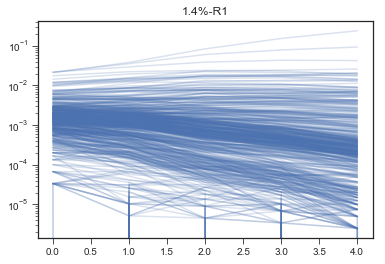

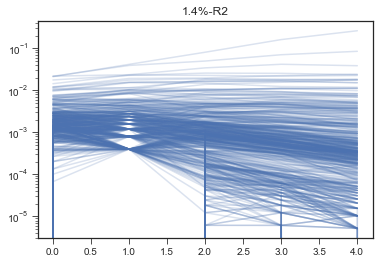

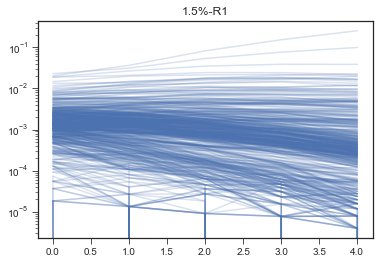

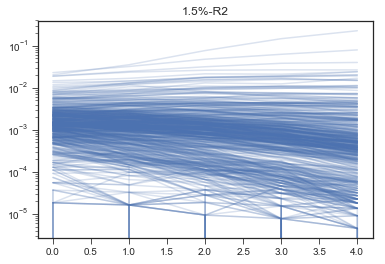

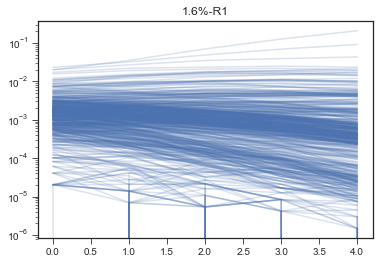

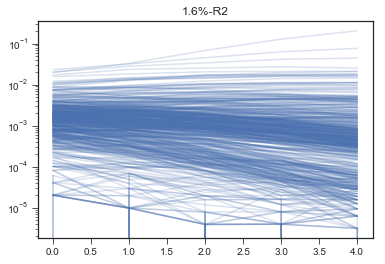

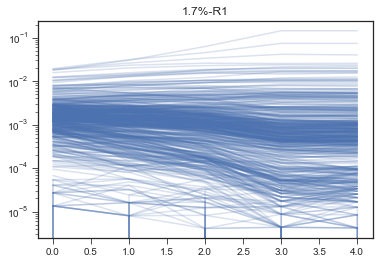

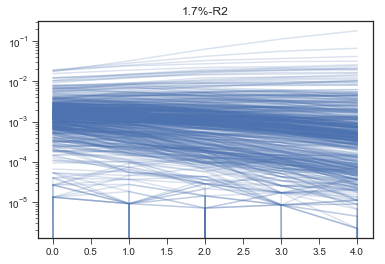

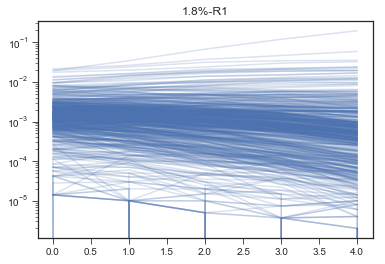

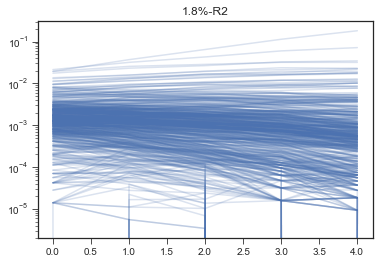

In [44]:
data = merged_data
data = data[~(data['barcode'].isin([7777777,9999999]))]

gradient_reps = ['1.4%-R1','1.4%-R2',
'1.5%-R1','1.5%-R2',
'1.6%-R1','1.6%-R2',
'1.7%-R1','1.7%-R2',
'1.8%-R1','1.8%-R2']


for rep in gradient_reps:
    these_times = []
    timepoints = []

    plt.figure()
    plt.title(rep)
    if rep.split('-')[0]+'-T0' in data.columns:
        these_times.append(rep.split('-')[0]+'-T0')
        timepoints.append(0)
        
    for i in range(1,5):
        if rep+'-T'+str(i) in data.columns:
            these_times.append(rep+'-T'+str(i))
            timepoints.append(i)
            
    print(these_times)


    BC_counts = data[these_times].values
    plt.plot(timepoints,(BC_counts/np.nansum(BC_counts,axis=0)).swapaxes(0,1),alpha=0.2,color='b')
    plt.yscale('log')



In [43]:
BC_counts

array([[2.2000e+01, 1.7400e+02, 1.0900e+02, 8.5000e+01, 6.8000e+01],
       [6.2900e+02, 7.3740e+03, 1.8479e+04, 4.4673e+04, 9.6279e+04],
       [1.1800e+02, 4.6100e+02, 2.5600e+02, 2.0000e+02, 1.5200e+02],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       [0.0000e+00, 4.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00],
       [6.0000e+00, 1.5000e+01, 9.0000e+00, 8.0000e+00, 1.0000e+00]])

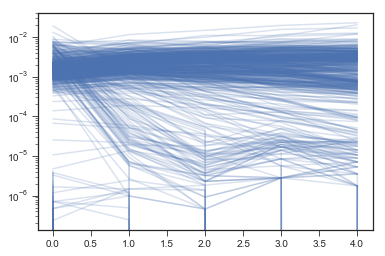

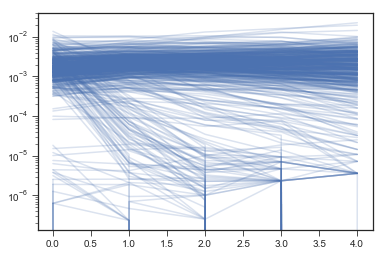

In [13]:
data = merged_data
data = data[~(data['barcode'].isin([7777777,9999999]))]

these_times = ['', 'P1', 'P2', 'P3', 'P4']
timepoints = [0,1,2,3,4]

BC_counts = data[these_times].values
plt.plot(timepoints,(BC_counts/np.nansum(BC_counts,axis=0)).swapaxes(0,1),alpha=0.2,color='b')
plt.yscale('log')

plt.figure()

these_times = ['M0', 'M1', 'M2', 'M3', 'M4']
timepoints = [0,1,2,3,4]

BC_counts = data[these_times].values
plt.plot(timepoints,(BC_counts/np.nansum(BC_counts,axis=0)).swapaxes(0,1),alpha=0.2,color='b')
plt.yscale('log')

In [67]:
remove_swaps = True
weighted = True

data = merged_data
data = data[~(data['barcode'].isin([7777777,9999999]))]
data = data.sort_values('barcode')
data = data.drop(columns=sparse_samples) # sparse timepoints resulting a lot of missing data
if remove_swaps:
    data = data.drop(columns=[col for col in flask_swaps.keys() if col not in sparse_samples]) # sparse timepoints resulting a lot of missing data
data = data.fillna(0)

cov_thresh = 1000

### called neutral by atish's method in ALL 5000 bc experiments (I think - need to verify this)
### [could also be below some set threshold across all experiments]
full_neutral_list = [17615,18486,42040,45014,58284,63611,73731,74185,80465,94896
,120600,125697,132511,134852,135750,190551,228237,238783,255561,298344
,308537,316954,317346,335717,411685,454359,469053] 

### from previous list but never has fitness above 3.5% (per gen) in any of 5000bc experiments
supergood_neutral = [17615, 24362, 42040, 71926, 72939, 73802, 80465, 109476, 113483, 
                     134852, 135750, 238783, 263665, 276406, 316954, 335717, 454359] 

### pulled from supergood list and spiked into 1BigBatch experiments
neutral_spikes = [17615,24362,42040,71926,73802,109476,113483,134852,263665,316954]

# neutrals = full_neutral_list
neutrals = list(np.unique(full_neutral_list+supergood_neutral+neutral_spikes))

neutrals = [bc for bc in data['barcode'].values if bc in neutrals]
# neutrals = neutral_spikes
print(neutrals)

weight_comparision = {}

for weighted in [True,False]:

    fitnesses = {}

    other_info = ['barcode','gene','type','ploidy','class','additional_muts']

    for condition,replicates in conditions.items():
        print(condition)
        print(replicates)
        rep_times = {}
        for rep in replicates:

            these_times = []
            timepoints = []
            if condition in old_conditions.keys():
                e,r = rep.split('.')
    #             if e in ['13','15']:
    #                 timepoints.append(0)
    #                 these_times.append('13-0_pool')
    #             else:
    #                 if e+'-0' in data.columns:
    #                     timepoints.append(0)
    #                     these_times.append(e+'-0')
                if e in ['t16','t17']:
                    for t in range(1,5):
                        if e+'.'+str(t)+'.'+r+'.x' in data.columns:
                            timepoints.append(t)
                            these_times.append(e+'.'+str(t)+'.'+r+'.x')

                elif 't' in e:
                    for t in range(1,5):
                        if e+'.'+str(t)+'.'+r in data.columns:
                            timepoints.append(t)
                            these_times.append(e+'.'+str(t)+'.'+r)
                else:
                    for t in range(1,5):
                        if e+'-'+str(t)+'-'+r in data.columns:
                            timepoints.append(t)
                            these_times.append(e+'-'+str(t)+'-'+r)


            if condition in bigbatch_conditions.keys():
                for i in range(5):
                    if rep+str(i) in data.columns:
                        these_times.append(rep+str(i))
                        timepoints.append(i)

            rep_times[rep] = data[these_times].values
            print(timepoints)
            print(rep)
        print({rep:np.nansum(rep_times[rep],axis=0) for rep in rep_times.keys()})
        print(rep_times)
        answer = atish.inferFitness(data['barcode'].values,timepoints,rep_times,
                                    neutralBarcodes=neutrals,lowCoverageThresh=cov_thresh,use_all_neutral=True,useMultNoise=True,weightedMean=weighted)


        for rep in replicates:

            fitnesses[rep+'_fitness'] = answer[rep]['aveFitness']
            fitnesses[rep+'_error'] = answer[rep]['aveError']

    for other_setting in other_info:
        if other_setting in data.columns:
            fitnesses[other_setting] = data[other_setting].values

    fitness_df = p.DataFrame(fitnesses)
    fitness_df = fitness_df.replace([np.inf, -np.inf], np.nan)
    # fitness_df = fitness_df.replace([float('Inf'),-float('Inf'),np.inf, -np.inf], np.nan)

    for condition,replicates in conditions.items():


        fitness_df[condition+'_fitness'] = np.nansum([fitness_df[rep+'_fitness'].values/fitness_df[rep+'_error'].values for rep in replicates],axis=0) \
        /np.nansum([1.0/fitness_df[rep+'_error'].values for rep in replicates],axis=0)

        fitness_df[condition+'_error'] = np.nansum([1.0/fitness_df[rep+'_error'].values for rep in replicates],axis=0)**(-1)



    fitness_df = fitness_df[other_info+[col for col in fitness_df if col not in other_info]]
    
    weight_comparision[weighted] = fitness_df

[17615, 24362, 42040, 71926, 72939, 73802, 109476, 113483, 120600, 134852, 263665, 298344, 316954]
3
['t3.1', 't3.2', 't3.3']
[1, 2, 3, 4]
t3.1
[1, 2, 3, 4]
t3.2
[1, 2, 3, 4]
t3.3
{'t3.1': array([1351750., 2135554., 1618035., 3250337.]), 't3.2': array([1933347., 2417818., 3119308., 2877315.]), 't3.3': array([1283986., 2070974., 2469955., 3200478.])}
{'t3.1': array([[2.32000e+02, 1.72000e+02, 7.90000e+01, 9.90000e+01],
       [5.20510e+04, 9.83780e+04, 9.78250e+04, 2.08593e+05],
       [1.08300e+03, 7.16000e+02, 2.76000e+02, 2.08000e+02],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00]]), 't3.2': array([[3.55000e+02, 1.50000e+02, 9.30000e+01, 6.60000e+01],
       [8.41730e+04, 1.15547e+05, 1.79070e+05, 2.02527e+05],
       [1.75800e+03, 6.60000e+02, 4.32000e+02, 2.04000e+02],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+

/Users/grantkinsler/Documents/Stanford/Research/TheoryPaper/code/fitness_assay_grantedits.py:226: RuntimeWarning: divide by zero encountered in power
  zScores = zScores*np.power(expectedReads,-0.5)
/Users/grantkinsler/Documents/Stanford/Research/TheoryPaper/code/fitness_assay_grantedits.py:226: RuntimeWarning: invalid value encountered in multiply
  zScores = zScores*np.power(expectedReads,-0.5)
/Users/grantkinsler/Documents/Stanford/Research/TheoryPaper/code/fitness_assay_grantedits.py:396: RuntimeWarning: divide by zero encountered in log
  allTimeFitness = np.log(allReads[repName][:,1:]/totReads[1:])-np.log(allReads[repName][:,0:-1]/totReads[0:-1])
/Users/grantkinsler/Documents/Stanford/Research/TheoryPaper/code/fitness_assay_grantedits.py:396: RuntimeWarning: invalid value encountered in subtract
  allTimeFitness = np.log(allReads[repName][:,1:]/totReads[1:])-np.log(allReads[repName][:,0:-1]/totReads[0:-1])
/Users/grantkinsler/Documents/Stanford/Research/TheoryPaper/code/fitness_a

neutral reads 574.0 487.0
neutral reads 2513.0 1479.0
neutral reads 1479.0 609.0
neutral reads 609.0 901.0
neutral reads 2513.0 1479.0
neutral reads 1479.0 609.0
neutral reads 609.0 901.0
Multiplicative noise consistency checks

t19.1  inconsistent times:

kappas [1.62140554 1.69808047 1.2699664 ]
multNoise [0.10725578 0.06744769 0.16204325]
No clear inconsistencies


t19.2  inconsistent times:

kappas [1.84854257 1.47620838 1.8913181 ]
multNoise [0.10725578 0.06744769 0.16204325]
No clear inconsistencies


t19.3  inconsistent times:

kappas [1.48827933 1.65675236 1.50505275]
multNoise [0.10725578 0.06744769 0.16204325]
No clear inconsistencies

20
['t20.1', 't20.2', 't20.3']
[1, 2, 3, 4]
t20.1
[1, 2, 3, 4]
t20.2
[1, 2, 3, 4]
t20.3
{'t20.1': array([ 307255., 1250628., 1089708.,  698235.]), 't20.2': array([1000502., 1275604.,  955884., 1226901.]), 't20.3': array([1129711., 1004777.,  930511., 1276530.])}
{'t20.1': array([[  555.,  2059.,  1387.,   696.],
       [ 4183., 19716., 28903., 

neutral reads 3939.0 1558.0
neutral reads 1558.0 782.0
neutral reads 782.0 284.0
neutral reads 3939.0 1558.0
neutral reads 1558.0 782.0
neutral reads 782.0 284.0
neutral reads 3368.0 1959.0
neutral reads 1959.0 776.0
neutral reads 776.0 430.0
neutral reads 3368.0 1959.0
neutral reads 1959.0 776.0
neutral reads 776.0 430.0
Multiplicative noise consistency checks

3.1  inconsistent times:

kappas [1.7437897  2.31538368 1.81788505]
multNoise [0.11285201 0.11902568 0.10235688]
No clear inconsistencies


3.2  inconsistent times:

kappas [4.73791928 5.1001428  1.46530054]
multNoise [0.11285201 0.11902568 0.10235688]
No clear inconsistencies


3.3  inconsistent times:

kappas [1.82660715 1.23125876 1.07245026]
multNoise [0.11285201 0.11902568 0.10235688]
No clear inconsistencies

M3_Batch_6
['6.1', '6.2', '6.3']
[1, 2, 3, 4]
6.1
[1, 3, 4]
6.2
[2, 3, 4]
6.3
{'6.1': array([1671081., 1912465., 3111800., 5779961.]), '6.2': array([1332407., 4294330., 2323633.]), '6.3': array([1130390., 3601479., 2

neutral reads 5114.0 3611.0
neutral reads 3611.0 1950.0
neutral reads 1950.0 977.0
neutral reads 5114.0 3609.0
neutral reads 3609.0 1950.0
neutral reads 1950.0 977.0
neutral reads 4793.0 3764.0
neutral reads 3764.0 1716.0
neutral reads 1716.0 891.0
neutral reads 4793.0 3763.0
neutral reads 3763.0 1716.0
neutral reads 1716.0 891.0
Multiplicative noise consistency checks

23.1  inconsistent times:

kappas [ 5.23085535  5.02580632 14.24103309]
multNoise [0.1111914  0.22360996 0.19588799]
No clear inconsistencies


23.2  inconsistent times:

kappas [12.92087     2.68153465  0.42254651]
multNoise [0.1111914  0.22360996 0.19588799]
No clear inconsistencies


23.3  inconsistent times:

kappas [3.21657572 2.28271529 0.75594518]
multNoise [0.1111914  0.22360996 0.19588799]
No clear inconsistencies

Ferm_44hr_Transfer
['t14.1', 't14.2', 't14.3']
[1, 2, 3, 4]
t14.1
[1, 2, 3, 4]
t14.2
[1, 2, 3, 4]
t14.3
{'t14.1': array([ 459383.,  754681., 1371749., 1630288.]), 't14.2': array([ 370695., 1078708., 

neutral reads 1228.0 108.0
neutral reads 108.0 387.0
neutral reads 387.0 785.0
neutral reads 1228.0 108.0
neutral reads 108.0 387.0
neutral reads 387.0 785.0
neutral reads 1418.0 1324.0
neutral reads 1324.0 2019.0
neutral reads 2019.0 1918.0
neutral reads 1418.0 1324.0
neutral reads 1324.0 2019.0
neutral reads 2019.0 1918.0
Multiplicative noise consistency checks

t17.1  inconsistent times:

kappas [1.90933733 7.03266771 3.41489615]
multNoise [0.14381961 0.14113048 0.11935539]
No clear inconsistencies


t17.2  inconsistent times:

kappas [0.95885632 8.67749145 1.15953053]
multNoise [0.14381961 0.14113048 0.11935539]
No clear inconsistencies


t17.3  inconsistent times:

kappas [3.0965094  5.45758148 5.35196306]
multNoise [0.14381961 0.14113048 0.11935539]
No clear inconsistencies

Resp_24hr_Transfer
['t5.1', 't5.2', 't5.3']
[1, 2, 3, 4]
t5.1
[1, 2, 3, 4]
t5.2
[1, 2, 3, 4]
t5.3
{'t5.1': array([1611571., 1631074., 2261076., 1200806.]), 't5.2': array([1658265., 3339597., 2110011., 1890232

neutral reads 270.0 75.0
neutral reads 652.0 597.0
neutral reads 597.0 270.0
neutral reads 270.0 75.0
neutral reads 1075.0 796.0
neutral reads 796.0 256.0
neutral reads 256.0 79.0
neutral reads 1075.0 796.0
neutral reads 796.0 256.0
neutral reads 256.0 79.0
neutral reads 1031.0 1341.0
neutral reads 1341.0 272.0
neutral reads 272.0 158.0
neutral reads 1031.0 1341.0
neutral reads 1341.0 272.0
neutral reads 272.0 158.0
Multiplicative noise consistency checks

t25.1  inconsistent times:

kappas [3.26889983 1.56668217 0.53251815]
multNoise [0.35121644 0.20966533 0.19599351]
No clear inconsistencies


t25.2  inconsistent times:

kappas [1.10410788 1.06298932 0.64762619]
multNoise [0.35121644 0.20966533 0.19599351]
No clear inconsistencies


t25.3  inconsistent times:

kappas [2.15371919 1.58338281 3.36838783]
multNoise [0.35121644 0.20966533 0.19599351]
No clear inconsistencies

Resp_6Day_Transfer
['t26.1', 't26.2', 't26.3']
[1, 2, 3, 4]
t26.1
[1, 2, 3, 4]
t26.2
[1, 2, 3, 4]
t26.3
{'t26.1': 

neutral reads 8708.0 531.0
neutral reads 531.0 575.0
neutral reads 12563.0 34212.0
neutral reads 34212.0 8700.0
neutral reads 8700.0 531.0
neutral reads 531.0 574.0
Multiplicative noise consistency checks

G  inconsistent times:

kappas [16.03350942 11.00299029  2.16337382  3.83862325]
multNoise [0.07247035 0.07420922 0.08399529 0.08759426]
No clear inconsistencies


H  inconsistent times:

kappas [22.503792    1.56247335  2.12669343  2.88068701]
multNoise [0.07247035 0.07420922 0.08399529 0.08759426]
No clear inconsistencies

1BB_1.8%Gluc
['I', 'J']
[0, 1, 2, 3, 4]
I
[0, 1, 2, 3, 4]
J
{'I': array([3494928., 3944246., 2010910.,  336244.,  681736.]), 'J': array([ 862616., 3090633., 2188349.,  384946.,  620947.])}
{'I': array([[  6639.,   6157.,   2544.,    380.,    466.],
       [ 69494., 107559.,  89549.,  20215.,  55134.],
       [  4786.,   4727.,   1970.,    306.,    440.],
       ...,
       [     0.,      0.,      0.,      0.,      0.],
       [  1796.,   2101.,   1093.,    183., 

neutral reads 19227.0 1725.0
neutral reads 1725.0 182.0
Multiplicative noise consistency checks

Q  inconsistent times:

kappas [ 5.87813693 28.14867006  8.04450439  3.61290177]
multNoise [0.12162756 0.07989464 0.18715693 0.19085044]
No clear inconsistencies


R  inconsistent times:

kappas [17.87219113  9.96735705  2.36183563  1.08622116]
multNoise [0.12162756 0.07989464 0.18715693 0.19085044]
No clear inconsistencies

1BB_17uMGdA
['S', 'T']
[0, 1, 2, 3, 4]
S
[0, 1, 2, 3]
T
{'S': array([ 784035., 2693362., 1498124., 1136013.,  245794.]), 'T': array([1155718., 2786858., 4357600., 1504106.])}
{'S': array([[1.37100e+03, 4.42400e+03, 1.98700e+03, 1.16100e+03, 2.04000e+02],
       [2.04540e+04, 1.08000e+05, 1.00327e+05, 9.83610e+04, 2.07940e+04],
       [1.02500e+03, 3.18500e+03, 1.37500e+03, 8.81000e+02, 9.70000e+01],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [2.88000e+02, 1.18300e+03, 5.75000e+02, 5.98000e+02, 1.58000e+02],
       [1.909

neutral reads 47821.0 13321.0
neutral reads 13321.0 2995.0
neutral reads 2995.0 298.0
neutral reads 25405.0 47789.0
neutral reads 47789.0 13316.0
neutral reads 13316.0 2995.0
neutral reads 2995.0 297.0
neutral reads 45645.0 75270.0
neutral reads 75270.0 69770.0
neutral reads 69770.0 7415.0
neutral reads 7415.0 1832.0
neutral reads 45645.0 75270.0
neutral reads 75270.0 69770.0
neutral reads 69770.0 7415.0
neutral reads 7415.0 1832.0
Multiplicative noise consistency checks

EE  inconsistent times:

kappas [36.53637687 11.10349978  3.7708841   0.91252134]
multNoise [0.07031539 0.04924835 0.08833187 0.07555515]
No clear inconsistencies


FF  inconsistent times:

kappas [38.39850258 48.82906783  5.28058323  4.34641848]
multNoise [0.07031539 0.04924835 0.08833187 0.07555515]
No clear inconsistencies

1BB_SucRaf
['GG']
[0, 1, 2, 3, 4]
GG
{'GG': array([2759564., 1570469.,  383176.,  313867.,  480985.])}
{'GG': array([[ 3758.,  1879.,   442.,   299.,   607.],
       [67840., 59385., 17611., 168

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:108: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:110: RuntimeWarning: divide by zero encountered in reciprocal


neutral reads 929.0 186.0
neutral reads 3092.0 419.0
neutral reads 419.0 929.0
neutral reads 929.0 186.0
Multiplicative noise consistency checks

t13.1  inconsistent times:

kappas [2.15050862 2.15191633 1.06519547]
multNoise [0.08911635 0.10355659 0.09156534]
No clear inconsistencies


t13.2  inconsistent times:

kappas [2.25742175 2.14560313 1.29673163]
multNoise [0.08911635 0.10355659 0.09156534]
No clear inconsistencies


t13.3  inconsistent times:

kappas [1.18817788 1.58393452 1.61461372]
multNoise [0.08911635 0.10355659 0.09156534]
No clear inconsistencies

18
['t18.1', 't18.2', 't18.3']
[1, 2, 3, 4]
t18.1
[1, 2, 3, 4]
t18.2
[1, 2, 3, 4]
t18.3
{'t18.1': array([ 159028.,   65552., 1262716., 2815883.]), 't18.2': array([ 159190.,  147763.,  369829., 3433687.]), 't18.3': array([ 113097.,  716047., 1408233., 2067197.])}
{'t18.1': array([[4.6000e+01, 1.8000e+01, 1.8500e+02, 2.3100e+02],
       [1.1722e+04, 3.8270e+03, 9.0831e+04, 2.4531e+05],
       [2.3800e+02, 8.7000e+01, 7.1900e+02

neutral reads 2638.0 2076.0
neutral reads 2076.0 807.0
neutral reads 807.0 510.0
neutral reads 2638.0 2076.0
neutral reads 2076.0 807.0
neutral reads 807.0 510.0
neutral reads 3817.0 2477.0
neutral reads 2477.0 1375.0
neutral reads 1375.0 703.0
neutral reads 3817.0 2477.0
neutral reads 2477.0 1375.0
neutral reads 1375.0 703.0
neutral reads 3408.0 2637.0
neutral reads 2637.0 1203.0
neutral reads 1203.0 660.0
neutral reads 3408.0 2637.0
neutral reads 2637.0 1203.0
neutral reads 1203.0 660.0
Multiplicative noise consistency checks

t23.1  inconsistent times:

kappas [3.84849652 6.70340731 4.2793084 ]
multNoise [0.11068945 0.21897472 0.19259372]
No clear inconsistencies


t23.2  inconsistent times:

kappas [2.96382097 0.51575749 0.0666384 ]
multNoise [0.11068945 0.21897472 0.19259372]
No clear inconsistencies


t23.3  inconsistent times:

kappas [4.01350075 1.43470647 2.88159359]
multNoise [0.11068945 0.21897472 0.19259372]
No clear inconsistencies

M3_Batch_3
['3.1', '3.2', '3.3']
[1, 2, 

neutral reads 1584.0 4934.0
neutral reads 4934.0 2127.0
neutral reads 2127.0 455.0
neutral reads 1584.0 4934.0
neutral reads 4934.0 2127.0
neutral reads 2127.0 455.0
neutral reads 6729.0 5439.0
neutral reads 5439.0 1780.0
neutral reads 1780.0 887.0
neutral reads 6727.0 5437.0
neutral reads 5437.0 1778.0
neutral reads 1778.0 887.0
neutral reads 8436.0 4470.0
neutral reads 4470.0 2359.0
neutral reads 2359.0 1982.0
neutral reads 8434.0 4469.0
neutral reads 4469.0 2359.0
neutral reads 2359.0 1982.0
Multiplicative noise consistency checks

20.1  inconsistent times:

kappas [92.38105792  4.39216822  3.10142546]
multNoise [0.28079292 0.25917991 0.24230539]
No clear inconsistencies


20.2  inconsistent times:

kappas [14.92209809 16.19130739  4.1368344 ]
multNoise [0.28079292 0.25917991 0.24230539]
No clear inconsistencies


20.3  inconsistent times:

kappas [5.95790214 0.92697898 3.29496852]
multNoise [0.28079292 0.25917991 0.24230539]
No clear inconsistencies

M3_Batch_21
['21.1', '21.2', '2

neutral reads 1051.0 219.0
Multiplicative noise consistency checks

t15.1  inconsistent times:

kappas [3.72102885 1.65100012 1.13941054]
multNoise [0.2152323  0.15726043 0.10166296]
No clear inconsistencies


t15.2  inconsistent times:

kappas [0.98231628 1.29979134 1.13430252]
multNoise [0.2152323  0.15726043 0.10166296]
No clear inconsistencies


t15.3  inconsistent times:

kappas [2.29918585 1.61770922 0.70272494]
multNoise [0.2152323  0.15726043 0.10166296]
No clear inconsistencies

Ferm_54hr_Transfer
['t16.1', 't16.2', 't16.3']
[1, 2, 3, 4]
t16.1
[1, 2, 3, 4]
t16.2
[1, 2, 3, 4]
t16.3
{'t16.1': array([ 211132.,  315122.,    8576., 3215837.]), 't16.2': array([ 270881.,  540984.,   97205., 1266185.]), 't16.3': array([ 322020., 3625797.,  531622., 1143157.])}
{'t16.1': array([[1.29000e+02, 1.73000e+02, 5.00000e+00, 6.99000e+02],
       [7.33900e+03, 1.93360e+04, 8.84000e+02, 7.58924e+05],
       [6.32000e+02, 7.38000e+02, 7.00000e+00, 2.45600e+03],
       ...,
       [0.00000e+00, 0.

neutral reads 50.0 28.0
neutral reads 195.0 96.0
neutral reads 96.0 50.0
neutral reads 50.0 24.0
neutral reads 44.0 123.0
neutral reads 123.0 53.0
neutral reads 53.0 15.0
neutral reads 38.0 102.0
neutral reads 102.0 48.0
neutral reads 48.0 10.0
Multiplicative noise consistency checks

t7.1  inconsistent times:

kappas [1.82176732 3.34503516 0.85311526]
multNoise [0.20578229 0.1900499  0.09344955]
No clear inconsistencies


t7.2  inconsistent times:

kappas [1.89772473 1.48340631 1.07571798]
multNoise [0.20578229 0.1900499  0.09344955]
No clear inconsistencies


t7.3  inconsistent times:

kappas [4.55511797 0.21164546 0.5298594 ]
multNoise [0.20578229 0.1900499  0.09344955]
No clear inconsistencies

Resp_4Day_Transfer
['t8.1', 't8.2']
[1, 2, 3, 4]
t8.1
[1, 2, 3, 4]
t8.2
{'t8.1': array([ 440152.,  808521., 1158276., 1178825.]), 't8.2': array([ 607694.,  811584., 1966072., 1156711.])}
{'t8.1': array([[2.90000e+01, 1.90000e+01, 2.60000e+01, 1.10000e+01],
       [3.42540e+04, 8.74720e+04, 1

neutral reads 1116.0 1042.0
neutral reads 1042.0 852.0
neutral reads 852.0 508.0
neutral reads 1116.0 1042.0
neutral reads 1042.0 852.0
neutral reads 852.0 508.0
neutral reads 3682.0 1682.0
neutral reads 1682.0 1471.0
neutral reads 1471.0 638.0
neutral reads 3682.0 1682.0
neutral reads 1682.0 1471.0
neutral reads 1471.0 638.0
neutral reads 3638.0 892.0
neutral reads 892.0 769.0
neutral reads 769.0 427.0
neutral reads 3638.0 892.0
neutral reads 892.0 769.0
neutral reads 769.0 427.0
Multiplicative noise consistency checks

t2.4  inconsistent times:

kappas [1.251955   0.78315945 1.37071349]
multNoise [0.2392541  0.36153724 0.30795692]
No clear inconsistencies


t2.5  inconsistent times:

kappas [2.77200518 8.37857357 2.44931988]
multNoise [0.2392541  0.36153724 0.30795692]
No clear inconsistencies


t2.6  inconsistent times:

kappas [2.67490912 5.42077337 1.0523252 ]
multNoise [0.2392541  0.36153724 0.30795692]
No clear inconsistencies

1BB_M3
['A', 'B', 'C', 'D']
[0, 1, 2, 3, 4]
A
[0, 1

Multiplicative noise consistency checks

I  inconsistent times:

kappas [18.47251843  6.73871868  3.58562255  3.4674751 ]
multNoise [0.1076651  0.04185463 0.08327063 0.07073765]
No clear inconsistencies


J  inconsistent times:

kappas [29.39735518  4.94697943  1.41166013  1.3528503 ]
multNoise [0.1076651  0.04185463 0.08327063 0.07073765]
No clear inconsistencies

1BB_0.2MNaCl
['K', 'L']
[0, 1, 2, 3, 4]
K
[0, 1, 3, 4]
L
{'K': array([ 557594., 4026764., 1965749.,  422848.,  588294.]), 'L': array([4830326., 2220931.,  310663.,  546790.])}
{'K': array([[1.0130e+03, 9.1650e+03, 5.2270e+03, 1.0910e+03, 1.5690e+03],
       [1.0470e+04, 6.6131e+04, 2.2936e+04, 4.4490e+03, 4.5530e+03],
       [7.5900e+02, 6.4510e+03, 3.8380e+03, 7.5600e+02, 1.2500e+03],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       [1.6400e+02, 4.3200e+02, 2.8000e+01, 2.0000e+00, 1.0000e+00],
       [1.3500e+03, 2.6960e+03, 2.0700e+02, 1.2000e+01, 4.0000e+00]]), 'L': array([[9.0300e+0

neutral reads 24631.0 25261.0
neutral reads 25261.0 1022.0
neutral reads 1022.0 891.0
neutral reads 58392.0 24612.0
neutral reads 24612.0 25256.0
neutral reads 25256.0 1022.0
neutral reads 1022.0 891.0
neutral reads 65482.0 28073.0
neutral reads 28073.0 10706.0
neutral reads 10706.0 896.0
neutral reads 896.0 581.0
neutral reads 65436.0 28066.0
neutral reads 28066.0 10702.0
neutral reads 10702.0 896.0
neutral reads 896.0 581.0
Multiplicative noise consistency checks

AA  inconsistent times:

kappas [ 3.13620859 11.11164284  2.03371394  1.97006162]
multNoise [0.06874392 0.09053068 0.07950911 0.0557381 ]
No clear inconsistencies


BB  inconsistent times:

kappas [1.61009753 3.03756614 2.37154021 2.09191185]
multNoise [0.06874392 0.09053068 0.07950911 0.0557381 ]
No clear inconsistencies

1BB_1%Gly
['CC', 'DD']
[0, 2, 3, 4]
CC
[0, 2, 3, 4]
DD
{'CC': array([3109752.,  720714.,  402430.,  653914.]), 'DD': array([3177315.,  390879.,  599778.,  575949.])}
{'CC': array([[ 5624.,   739.,   272.,

In [68]:
my_df = weight_comparision[False][bigbatch_columns].dropna()

spike_in_missense = [9000000 + i for i in range(11)]
spike_in_nonsense = [9000100 + i for i in range(11)]
gpb2s = [bc for bc in my_df[my_df['gene']=='GPB2']['barcode'].values]
pde2s = [bc for bc in my_df[my_df['gene']=='PDE2']['barcode'].values]
neutrals = [bc for bc in  my_df[my_df['barcode'].isin(neutrals)]['barcode'].values]
diploids = [bc for bc in my_df[(my_df['gene']=='Diploid') & (my_df['1BB_M3_fitness']<0.41)]['barcode'].values]

# classes = [spike_in_missense,spike_in_nonsense,gpb2s,pde2s,diploids]
# class_names = ['Missense','Nonsense','GPB2','PDE2','Diploid']
# class_colors = ['b','r','g','orange',tools.mutant_colorset['Diploid']]

classes = [neutrals,spike_in_missense,spike_in_nonsense,gpb2s,pde2s,diploids]
class_names = ['neutrals','Missense','Nonsense','GPB2','PDE2','Diploids']
class_colors = ['k','b','r','g','orange',tools.mutant_colorset['Diploid']]

# classes = [spike_in_missense,spike_in_nonsense,gpb2s]
# class_names = ['Missense','Nonsense','GPB2']
# class_colors = ['b','r','g']





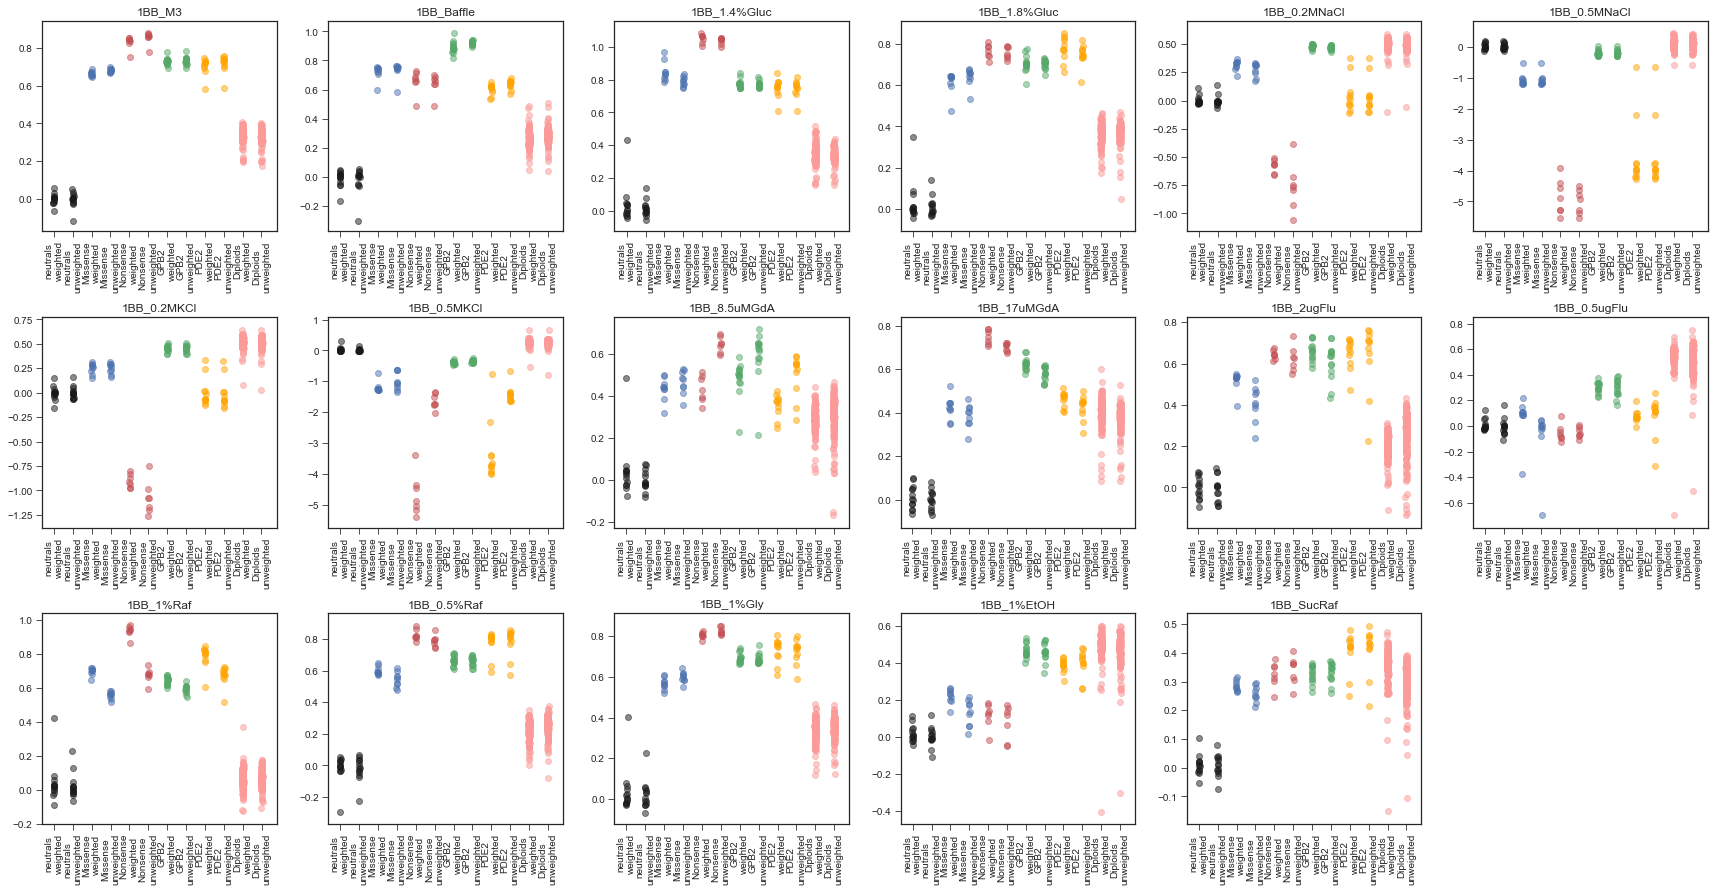

In [70]:
my_weighted_df = weight_comparision[True][bigbatch_columns].dropna()
my_unweighted_df = weight_comparision[False][bigbatch_columns].dropna()

n_samples = 100000
n_classes = len(classes)

plt.figure(figsize=(6*4,6*4))
for jj,condition in enumerate(list(bigbatch_conditions.keys())):
    plt.subplot(6,6,jj+1)
#     plt.figure()
    plt.title(condition)
    
    names = []
    
    for c,this_class in enumerate(classes):
        
        barcode_list = np.intersect1d(my_weighted_df[my_weighted_df['barcode'].isin(this_class)]['barcode'].values,
                                     my_unweighted_df[my_unweighted_df['barcode'].isin(this_class)]['barcode'].values)
        
        
        this_weight = my_weighted_df[my_weighted_df['barcode'].isin(barcode_list)][f'{condition}_fitness'].values
        this_unweight = my_unweighted_df[my_unweighted_df['barcode'].isin(barcode_list)][f'{condition}_fitness'].values


        plt.scatter([tools.jitter_point(c,0.01) for i in range(len(this_weight))],this_weight,color=class_colors[c],alpha=0.5)
        plt.scatter([tools.jitter_point(c+0.5,0.01) for i in range(len(this_unweight))],this_unweight,color=class_colors[c],alpha=0.5)
        
        names.append(f'{class_names[c]}\nweighted')
        names.append(f'{class_names[c]}\nunweighted')

    plt.xticks(np.arange(0,len(classes),0.5),names,rotation=90)
plt.tight_layout()       
plt.savefig('weighted_unweighted_1bigbatch_comparison.pdf',bbox_inches='tight')
    

In [26]:
these_times = ['P0','P1','P2','P3','P4']
timepoints = [0,1,2,3,4]
    
rep_times = {'P':data[these_times].values}
    
answer = atish.inferFitness(data['barcode'].values,timepoints,rep_times,
                                    neutralBarcodes=neutrals,lowCoverageThresh=cov_thresh,use_all_neutral=True,useMultNoise=True,weightedMean=True)



5
neutral reads 63424.0 75526.0
neutral reads 75526.0 34100.0
neutral reads 34100.0 5241.0
neutral reads 5241.0 5275.0
neutral reads 63424.0 75526.0
neutral reads 75526.0 34100.0
neutral reads 34100.0 5241.0
neutral reads 5241.0 5275.0
Multiplicative noise consistency checks

P  inconsistent times:

kappas [20.48771911 16.09384578 11.11302452  9.39738435]
multNoise [0.1 0.1 0.1 0.1]
No clear inconsistencies



/Users/grantkinsler/Documents/Stanford/Research/TheoryPaper/code/fitness_assay_grantedits.py:226: RuntimeWarning: divide by zero encountered in power
  zScores = zScores*np.power(expectedReads,-0.5)
/Users/grantkinsler/Documents/Stanford/Research/TheoryPaper/code/fitness_assay_grantedits.py:226: RuntimeWarning: invalid value encountered in multiply
  zScores = zScores*np.power(expectedReads,-0.5)
/Users/grantkinsler/Documents/Stanford/Research/TheoryPaper/code/fitness_assay_grantedits.py:396: RuntimeWarning: divide by zero encountered in log
  allTimeFitness = np.log(allReads[repName][:,1:]/totReads[1:])-np.log(allReads[repName][:,0:-1]/totReads[0:-1])
/Users/grantkinsler/Documents/Stanford/Research/TheoryPaper/code/fitness_assay_grantedits.py:396: RuntimeWarning: invalid value encountered in subtract
  allTimeFitness = np.log(allReads[repName][:,1:]/totReads[1:])-np.log(allReads[repName][:,0:-1]/totReads[0:-1])
/Users/grantkinsler/Documents/Stanford/Research/TheoryPaper/code/fitness_a

In [64]:
def inverseVarAve(meanVals,standardDevs):
    """
    inverseVarAve - take weighted average with inverse variances.
    :param meanVals: Values to be averaged, N x q. Averaged across second dimension
    :param standardDevs: Standard errors of each value, N x q
    :return weightedMeans: N x 1 vector of weighted average
    :return weightedStandardDevs: N x 1 vector of final standard error
    """

    meanVals[meanVals == np.inf] = np.nan
    meanVals[meanVals == -np.inf] = np.nan
    standardDevs[standardDevs == np.inf]= np.nan
    standardDevs[standardDevs == -np.inf] = np.nan

    # weightedMeans = np.sum(meanVals*np.power(standardDevs,-2),axis=1)/np.sum(np.power(standardDevs,-2),axis=1)
    # weightedStandardDevs = np.power(np.sum(np.power(standardDevs,-2),axis=1),-0.5)

    weightedMeans = np.nansum(meanVals*np.power(standardDevs,-2),axis=1)/np.nansum(np.power(standardDevs,-2),axis=1)
    weightedStandardDevs = np.power(np.nansum(np.power(standardDevs,-2),axis=1),-0.5)

    return weightedMeans,weightedStandardDevs

def OLDinverseVarAve(meanVals,standardDevs):
    """
    inverseVarAve - take weighted average with inverse variances.
    :param meanVals: Values to be averaged, N x q. Averaged across second dimension
    :param standardDevs: Standard errors of each value, N x q
    :return weightedMeans: N x 1 vector of weighted average
    :return weightedStandardDevs: N x 1 vector of final standard error
    """

#     meanVals[meanVals == np.inf] = np.nan
#     meanVals[meanVals == -np.inf] = np.nan
#     standardDevs[standardDevs == np.inf]= np.nan
#     standardDevs[standardDevs == -np.inf] = np.nan

    weightedMeans = np.sum(meanVals*np.power(standardDevs,-2),axis=1)/np.sum(np.power(standardDevs,-2),axis=1)
    weightedStandardDevs = np.power(np.sum(np.power(standardDevs,-2),axis=1),-0.5)

#     weightedMeans = np.nansum(meanVals*np.power(standardDevs,-2),axis=1)/np.nansum(np.power(standardDevs,-2),axis=1)
#     weightedStandardDevs = np.power(np.nansum(np.power(standardDevs,-2),axis=1),-0.5)

    return weightedMeans,weightedStandardDevs


In [63]:
# answer['P']['allTimeFitness'][-10:,:]
inverseVarAve(answer['P']['allTimeFitness'][-10:,:],answer['P']['allTimeErrors'][-10:,:])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in power


(array([-1.19464413, -5.40713792,         nan, -4.46802594, -5.16835191,
        -4.35434974, -3.39414997,         nan, -5.05004444, -4.88220097]),
 array([0.13822483, 0.64622315,        inf, 0.77113333, 0.72872606,
        0.85376886, 1.69794449,        inf, 1.2951709 , 0.563349  ]))

In [65]:
OLDinverseVarAve(answer['P']['allTimeFitness'][-10:,:],answer['P']['allTimeErrors'][-10:,:])

(array([-1.19464413,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan, -4.88220097]),
 array([0.13822483,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan, 0.563349  ]))

In [55]:
fitness_assay_grantedits.inverseVarAve(answer['P']['allTimeFitness'][-10:,:],answer['P']['allTimeErrors'][-10:,:])

NameError: name 'fitness_assay_grantedits' is not defined

In [38]:
np.where(data['barcode'].values,spike_in_nonsense)[0]

ValueError: either both or neither of x and y should be given

In [53]:
answer

{'P': {'allTimeErrors': array([[0.10873994, 0.11095647, 0.13926211, 0.12304796],
         [0.11785511, 0.2791174 , 0.50158498, 0.46291572],
         [0.11180215, 0.11478493, 0.14469975, 0.12758322],
         ...,
         [       inf,        inf,        inf,        inf],
         [1.3684005 , 4.01295973,        inf,        inf],
         [0.60781055, 2.00834794, 3.33511987, 3.06714596]]),
  'allTimeFitness': array([[ 0.2436911 ,  0.31720123,  0.10022823,  0.42870253],
         [-2.90815357, -2.30597649,  0.23336632, -0.00646636],
         [ 0.24818369,  0.31447962,  0.26571215,  0.3811234 ],
         ...,
         [        nan,         nan,         nan,         nan],
         [-5.45089228, -1.60271569,        -inf,         nan],
         [-5.52865223, -1.86157732,  0.4864907 , -0.00646636]]),
  'aveError': array([0.05940121, 0.10343284, 0.06141858, 0.0815201 , 0.07087879,
         0.21840273,        inf, 0.06263834, 0.49653483, 0.06100847,
                inf, 4.52744068, 0.0972586 , 0

In [30]:
allothersneutral = p.read_csv('../data/fitness_weighted_allconditions_swapsremoved_ALLOTHERSNEUTRAL.csv')
allothersneutral =allothersneutral
allothersneutral= allothersneutral.replace([np.inf, -np.inf], np.nan)
# this_data = this_data.dropna('columns',how='all')
allothersneutral = allothersneutral.dropna()
allothersneutral = allothersneutral.sort_values('barcode')

classicneutral = p.read_csv('../data/fitness_weighted_allconditions_swapsremoved.csv')
classicneutral = classicneutral
classicneutral= classicneutral.replace([np.inf, -np.inf], np.nan)
classicneutral = classicneutral.dropna()
classicneutral = classicneutral.sort_values('barcode')

In [31]:
allothersneutral

barcode            gene                type        ploidy  \
0         53         Diploid             Diploid       Diploid   
1        151            IRA1         stop_gained       Haploid   
2        262    NotSequenced        NotSequenced  NotSequenced   
3        273            IRA1  frameshift_variant       Haploid   
4        323    NotSequenced        NotSequenced  NotSequenced   
5        415            IRA1  frameshift_variant       Haploid   
8        689            IRA1  frameshift_variant       Haploid   
9        697    NotSequenced        NotSequenced  NotSequenced   
12      1379    NotSequenced        NotSequenced  NotSequenced   
13      1488    NotSequenced        NotSequenced  NotSequenced   
14      1564         Diploid             Diploid       Diploid   
15      1617            PDE2  frameshift_variant       Haploid   
16      1641           other               other         other   
17      1683           other               other         other   
18      1866            PDE2         stop_gained       Haploid   
19      2037         Diploid             Diploid       Diploid   
20      2039  Diploid + IRA2  frameshift_variant       Diploid   
21      2288            GPB2         stop_gained       Haploid   
22      2468            IRA2    missense_variant       Haploid   
23      2608            GPB1  frameshift_variant       Haploid   
24      2768            GPB2         stop_gained       Haploid   
25      2776         Diploid             Diploid       Diploid   
26      2808         Diploid             Diploid       Diploid   
28      3250    NotSequenced        NotSequenced  NotSequenced   
30      3379         Diploid             Diploid       Diploid   
31      3406            IRA2    missense_variant       Haploid   
33      3577  Diploid + IRA2    missense_variant       Diploid   
34      3585         Diploid             Diploid       Diploid   
35      3675            IRA1    missense_variant       Haploid   
36      3730    NotSequenced        NotSequenced  NotSequenced   
..       ...             ...                 ...           ...   
474   298344           other               other         other   
475   303501           other               other         other   
476   304483           other               other         other   
477   304935    NotSequenced        NotSequenced  NotSequenced   
478   309605    NotSequenced        NotSequenced  NotSequenced   
479   309655            PDE2  frameshift_variant       Haploid   
480   310209         Diploid             Diploid       Diploid   
481   316048           other               other         other   
483   317672         Diploid             Diploid       Diploid   
485   328579         Diploid             Diploid       Diploid   
486   329774         Diploid             Diploid       Diploid   
487   330943           other               other         other   
490   334616           other               other         other   
491   336972            SCH9    missense_variant       Haploid   
492   338908         Diploid             Diploid       Diploid   
493   340123    NotSequenced        NotSequenced  NotSequenced   
496   349198    NotSequenced        NotSequenced  NotSequenced   
497   349927    NotSequenced        NotSequenced  NotSequenced   
498   352078           other               other         other   
499   352705           other               other         other   
503   375115         Diploid             Diploid       Diploid   
505   379777            IRA2    missense_variant       Haploid   
506   381707           other               other         other   
508   392361         Diploid             Diploid       Diploid   
514   419648           other               other         other   
515   419831         Diploid             Diploid       Diploid   
516   425471         Diploid             Diploid       Diploid   
518   430247           other               other         other   
520   434397         Diploid             Dipl

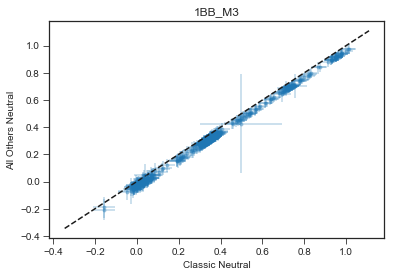

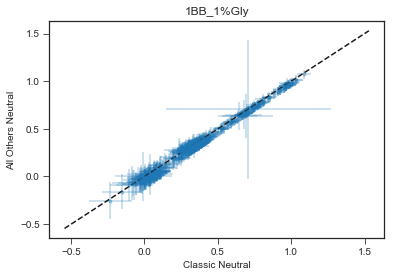

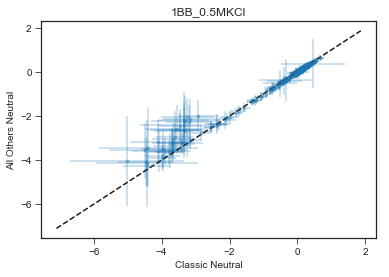

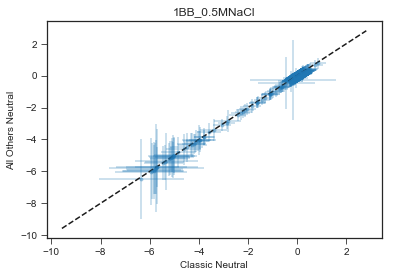

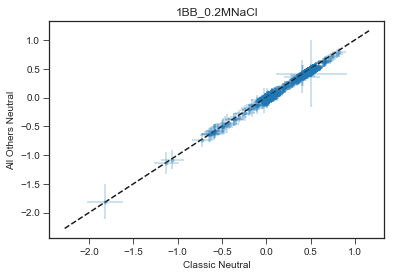

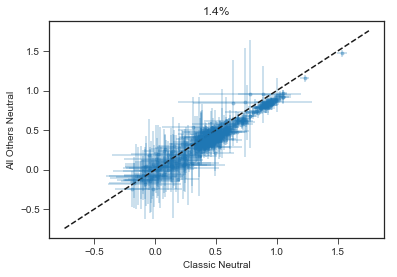

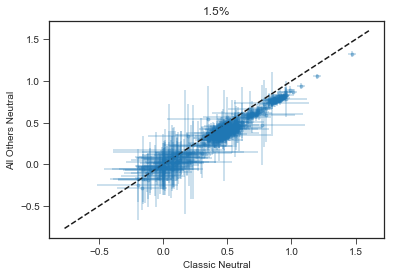

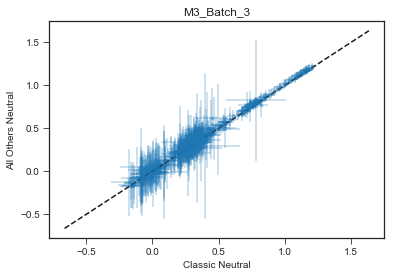

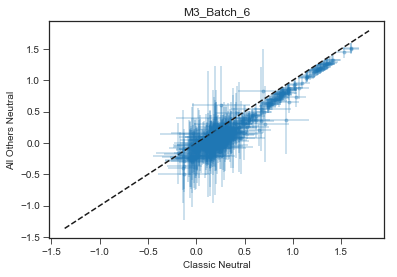

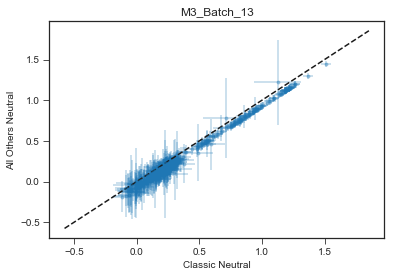

In [44]:
condition_list = ['1BB_M3','1BB_1%Gly','1BB_0.5MKCl','1BB_0.5MNaCl','1BB_0.2MNaCl',
                  '1.4%','1.5%','M3_Batch_3','M3_Batch_6','M3_Batch_13']

for condition in condition_list:
    plt.figure()
    plt.title(condition)
    plt.errorbar(classicneutral[f'{condition}_fitness'].values,allothersneutral[f'{condition}_fitness'].values,
             xerr=2*classicneutral[f'{condition}_error'].values,yerr=2*allothersneutral[f'{condition}_error'].values,
                 alpha=0.3,linestyle='',marker='.')
    ymin,ymax = plt.ylim()
    xmin,xmax = plt.xlim()
    plt.plot([min([xmin,ymin]),max([xmax,ymax])],[min([xmin,ymin]),max([xmax,ymax])],'k--')
    plt.xlabel('Classic Neutral')
    plt.ylabel('All Others Neutral')
# plt.scatter(classicneutral['1BB_M3_fitness'].values,allothersneutral['1BB_M3_fitness'].values)